In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression

%load_ext autoreload
%autoreload 2
import preprocessing
import models

In [47]:
# Suppress all warnings globally (adjust based on specific warnings you want to ignore)
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings("ignore", message=".*l1_ratio parameter is only used when penalty is 'elasticnet'")

In [3]:
ArmZ_file = '/Users/irf3irf3/Desktop/offline_workspace/Jessica/Ichor and Chromosome Arm Models/arm_z_wide.csv'
Ratio_file = '/Users/irf3irf3/Desktop/offline_workspace/Jessica/Ichor and Chromosome Arm Models/ratios_wide.csv'
EndMotif_file = '/Users/irf3irf3/Desktop/offline_workspace/ResearchCode2_in_transition/Tissue_of_origin/EndMotif_frequency.txt'


ArmZ = pd.read_csv(ArmZ_file).set_index("library")
Ratio = pd.read_csv(Ratio_file).set_index("library")

ArmZ.index.name = None
Ratio.index.name = None


EndMotif = pd.read_csv(EndMotif_file, sep='\t', index_col=0)




display(Ratio.head())
display(ArmZ.head())
display(EndMotif.head())

,cohort,chr1_5000000_10000000,chr1_10000000_15000000,chr1_15000000_20000000,chr1_20000000_25000000,chr1_25000000_30000000,chr1_30000000_35000000,chr1_35000000_40000000,chr1_40000000_45000000,chr1_45000000_50000000,...,chr9_15000000_20000000,chr9_20000000_25000000,chr9_25000000_30000000,chr9_90000000_95000000,chr9_95000000_100000000,chr9_100000000_105000000,chr9_110000000_115000000,chr9_115000000_120000000,chr9_120000000_125000000,chr9_125000000_130000000
58,Healthy,-0.021039,-0.019367,-0.030353,-0.020654,-0.020983,-0.011688,-0.010893,-0.020116,-0.014497,...,0.007122,0.015006,0.011725,-0.009685,-0.017064,0.015936,-0.017214,0.002501,-0.012768,-0.025228
73,Healthy,0.051770,0.024914,0.036842,0.059739,0.026992,0.059263,0.024624,0.042534,0.010221,...,-0.012613,-0.033648,-0.036388,0.038446,-0.007840,-0.057904,0.039415,0.014236,-0.000344,0.032791
74,Healthy,0.035062,0.033907,0.021390,0.031846,0.014885,0.024985,0.018009,0.017431,-0.009482,...,0.004668,-0.021091,-0.019005,-0.005667,0.010702,-0.020067,0.003183,0.008317,0.014109,0.023628
81,Healthy,0.028886,0.018559,0.021573,0.024240,0.020358,0.019593,0.003843,0.012119,-0.009127,...,-0.009311,0.001900,-0.002607,0.014636,-0.013138,-0.011739,0.010163,-0.009431,-0.009023,0.011814
83,Healthy,-0.033048,-0.037325,-0.048439,-0.041196,-0.034455,-0.029842,-0.020518,-0.021768,-0.022954,...,0.006940,0.017985,0.019683,-0.017984,-0.011737,0.017108,-0.017930,0.009451,-0.019297,-0.045386


,cohort,chr1_p,chr1_q,chr10_p,chr10_q,chr11_p,chr11_q,chr12_p,chr12_q,chr13_q,...,chr5_p,chr5_q,chr6_p,chr6_q,chr7_p,chr7_q,chr8_p,chr8_q,chr9_p,chr9_q
58,Healthy,0.500638,0.481548,-0.410989,0.848811,-0.218577,0.824577,0.649369,-0.405411,0.029293,...,-0.263070,-0.191412,0.609609,-0.420965,-0.786807,-0.330025,-0.402745,-0.713632,-0.284287,0.108390
73,Healthy,-1.083426,-1.220784,0.459364,0.366229,1.666293,-0.584459,0.152188,-0.704706,0.642475,...,1.484744,-0.756864,-1.000383,1.054155,0.408653,1.292797,0.072355,0.748582,0.807086,0.277831
74,Healthy,-0.420803,0.051099,1.188064,-0.764085,-0.576497,-2.138650,-0.094162,-0.353201,0.220072,...,-0.125466,0.630959,0.631229,0.197558,0.130784,-0.146538,-0.379365,0.138085,0.162191,-0.578078
81,Healthy,-1.398996,1.308646,-0.794303,0.732416,3.011589,1.921797,-1.770148,-0.809331,0.325861,...,1.979131,-0.189816,-2.545631,1.817232,1.264974,2.246687,1.569387,1.580092,0.393157,0.338279
83,Healthy,-0.033880,0.633287,-0.678556,0.435361,0.383254,0.720053,0.868606,-0.358796,0.112183,...,0.986982,2.086188,0.603034,0.294714,0.672683,0.055100,-1.005939,0.745358,0.468220,-0.347326


,PB-278_UC1_sorted_motifs.txt,PB046_UC1_sorted_motifs.txt,NU90_sorted_motifs.txt,RCC013_UC1_sorted_motifs.txt,NU71_sorted_motifs.txt,PB206_UC1_sorted_motifs.txt,PB-280_UC1_sorted_motifs.txt,PB-276_UC1_sorted_motifs.txt,PB-305_UC1_sorted_motifs.txt,NU75_sorted_motifs.txt,...,WBC1222_UC1.dup_mk_motifs.txt,BC020_UC1.dup_mk_motifs.txt,WBC1196_UC1.dup_mk_motifs.txt,WBC1111_UC1.dup_mk_motifs.txt,WBC1188_UC1.dup_mk_motifs.txt,BC016_UC1.dup_mk_motifs.txt,WBC1309_UC1.dup_mk_motifs.txt,WBC1304_UC1.dup_mk_motifs.txt,WBC1322_UC1.dup_mk_motifs.txt,BC011_UC1.dup_mk_motifs.txt
AAAA,1697863,2047129,2053065,1694213,1874416,1873724,1921580,1652556,1798992,2792628,...,3387457,4008682,4443565,3525488,3312042,5670317,3231885,3880230,7808827,3840687
AAAC,558742,655722,645064,545181,612951,597739,606259,544355,597292,887600,...,764229,1109904,1278700,1011524,950838,1407264,1012539,1127552,2241726,1107479
AAAG,718290,842404,823364,722142,799007,789866,792731,692573,752361,1144903,...,982137,1451558,1638985,1288801,1283328,1895845,1325801,1488290,2918270,1468987
AAAT,1002696,1147014,1098857,917790,1075842,1064783,1089432,962189,978963,1546633,...,1085110,1954151,2228700,1779818,1614284,2389220,1755192,1912909,3622751,1674478
AACA,640921,759313,711681,622732,684254,677695,671315,626294,682286,1000480,...,935029,1242647,1491640,1197716,1126611,1728622,1152911,1377830,2690625,1398048


In [4]:
CNA = ArmZ.drop('cohort', axis=1).T
Ratio = Ratio.drop('cohort', axis=1).T

display(CNA.head())
display(Ratio.head())

,58,73,74,81,83,BC001_UC1,BC002_UC1,BC003_UC1,BC004_UC1,BC005_UC1,...,WBC1311_UC1,WBC1312_UC1,WBC1313_UC1,WBC1314_UC1,WBC1315_UC1,WBC1317_UC1,WBC1318_UC1,WBC1320_UC1,WBC1322_UC1,WBC1324_UC1
chr1_p,0.500638,-1.083426,-0.420803,-1.398996,-0.033880,0.780274,-2.180396,0.782572,1.027945,-1.133924,...,-0.728816,-0.337504,-3.506652,0.054370,-1.077602,0.375962,0.087941,-0.230680,-1.347024,-0.328951
chr1_q,0.481548,-1.220784,0.051099,1.308646,0.633287,3.417682,2.903743,0.686933,1.285963,-0.471709,...,-0.061192,-0.091333,6.863572,0.483224,-0.971273,1.363424,0.331620,-0.063272,-1.794822,-0.067849
chr10_p,-0.410989,0.459364,1.188064,-0.794303,-0.678556,-2.533819,5.774827,1.743248,2.061444,0.508120,...,1.188277,0.703937,6.090007,-1.577790,1.628864,1.201583,0.888284,0.365613,-0.845244,0.913896
chr10_q,0.848811,0.366229,-0.764085,0.732416,0.435361,-0.787439,-1.173610,3.542784,-0.540900,-1.093383,...,-2.131089,-0.912207,-22.919694,0.195062,0.229661,-2.714400,-0.950577,-0.332129,-3.283414,0.754528
chr11_p,-0.218577,1.666293,-0.576497,3.011589,0.383254,-2.370622,4.136560,-0.821380,-1.203769,-0.114111,...,-0.400553,-0.063994,-16.543998,0.057660,-9.572329,-2.285091,-0.431836,0.001281,-1.473132,-0.096034


,58,73,74,81,83,BC001_UC1,BC002_UC1,BC003_UC1,BC004_UC1,BC005_UC1,...,WBC1311_UC1,WBC1312_UC1,WBC1313_UC1,WBC1314_UC1,WBC1315_UC1,WBC1317_UC1,WBC1318_UC1,WBC1320_UC1,WBC1322_UC1,WBC1324_UC1
chr1_5000000_10000000,-0.021039,0.051770,0.035062,0.028886,-0.033048,0.001773,0.021462,0.012149,1.277114e-02,0.034097,...,0.018560,-0.011622,-0.017025,0.003578,0.073420,0.030748,0.000096,0.045943,-0.048431,0.019924
chr1_10000000_15000000,-0.019367,0.024914,0.033907,0.018559,-0.037325,0.005899,0.015108,0.011341,1.282568e-02,0.033062,...,0.014002,-0.003107,-0.011186,0.004146,0.069920,0.022014,-0.009324,0.039728,-0.045393,0.014763
chr1_15000000_20000000,-0.030353,0.036842,0.021390,0.021573,-0.048439,0.001090,0.008654,-0.002082,-5.997953e-03,0.006861,...,-0.006208,-0.013992,-0.021590,0.000763,0.055114,0.016451,-0.012564,0.024183,-0.079331,0.006242
chr1_20000000_25000000,-0.020654,0.059739,0.031846,0.024240,-0.041196,0.004013,0.012817,0.010174,6.564354e-03,0.037555,...,0.018111,-0.005459,-0.008415,0.002161,0.073577,0.025016,-0.004567,0.031184,-0.048032,0.015166
chr1_25000000_30000000,-0.020983,0.026992,0.014885,0.020358,-0.034455,0.009259,0.015607,0.011452,-9.562842e-07,0.028230,...,0.006256,-0.014720,-0.005249,0.009170,0.026160,0.028319,-0.014588,0.049296,-0.058022,0.018853


In [5]:
EndMotif.columns = EndMotif.columns.str.replace('_sorted_motifs.txt', '')
EndMotif.columns = EndMotif.columns.str.replace('.dup_mk_motifs.txt', '')
display(EndMotif.head())

,PB-278_UC1,PB046_UC1,NU90,RCC013_UC1,NU71,PB206_UC1,PB-280_UC1,PB-276_UC1,PB-305_UC1,NU75,...,WBC1222_UC1,BC020_UC1,WBC1196_UC1,WBC1111_UC1,WBC1188_UC1,BC016_UC1,WBC1309_UC1,WBC1304_UC1,WBC1322_UC1,BC011_UC1
AAAA,1697863,2047129,2053065,1694213,1874416,1873724,1921580,1652556,1798992,2792628,...,3387457,4008682,4443565,3525488,3312042,5670317,3231885,3880230,7808827,3840687
AAAC,558742,655722,645064,545181,612951,597739,606259,544355,597292,887600,...,764229,1109904,1278700,1011524,950838,1407264,1012539,1127552,2241726,1107479
AAAG,718290,842404,823364,722142,799007,789866,792731,692573,752361,1144903,...,982137,1451558,1638985,1288801,1283328,1895845,1325801,1488290,2918270,1468987
AAAT,1002696,1147014,1098857,917790,1075842,1064783,1089432,962189,978963,1546633,...,1085110,1954151,2228700,1779818,1614284,2389220,1755192,1912909,3622751,1674478
AACA,640921,759313,711681,622732,684254,677695,671315,626294,682286,1000480,...,935029,1242647,1491640,1197716,1126611,1728622,1152911,1377830,2690625,1398048


In [6]:
# Step 1: Find common columns
common_columns = set(EndMotif.columns) & set(CNA.columns) & set(Ratio.columns)
common_columns_list = list(common_columns)  # Convert to list

# Step 2: Find non-common columns
non_common_endmotif = set(EndMotif.columns) - common_columns
non_common_cna = set(CNA.columns) - common_columns
non_common_ratio = set(Ratio.columns) - common_columns

# Print non-common columns
print("Non-common columns in EndMotif:", non_common_endmotif)
print("Non-common columns in CNA:", non_common_cna)
print("Non-common columns in Ratio:", non_common_ratio)

# Step 3: Filter DataFrames to keep only common columns
EndMotif = EndMotif[common_columns_list]
CNA = CNA[common_columns_list]
Ratio = Ratio[common_columns_list]


print(CNA.shape)
display(CNA.head())

print(Ratio.shape)
display(Ratio.head())

print(EndMotif.shape)
display(EndMotif.head())

Non-common columns in EndMotif: {'WBC1291_UC1', 'WBC1320_UC1b'}
Non-common columns in CNA: {'NU19R_UC1', 'NU32_UC1', 'WBC1116_UC1', 'WBC1207_UC1', 'WBC1135_UC1', 'WBC1202_UC1', 'WBC1198_UC1'}
Non-common columns in Ratio: {'NU19R_UC1', 'NU32_UC1', 'WBC1116_UC1', 'WBC1207_UC1', 'WBC1135_UC1', 'WBC1202_UC1', 'WBC1198_UC1'}
(38, 199)


,WBC1322_UC1,WBC1298_UC1,WBC1182_UC1,BC001_UC1,BC005_UC1,WBC1304_UC1,NU71,PB-278_UC1,NU83,RCC009_UC2,...,NU69,PB-177_UC1,BC019_UC1,RCC006_UC1,NU102,PB163_UC1,BC006_UC1,PB-162_UC1,RCC005_UC2,WBC1076_UC1
chr1_p,-1.347024,-0.992834,14.923479,0.780274,-1.133924,-0.221525,-0.360543,0.203925,1.424330,-0.698785,...,1.570954,0.318145,-0.084664,0.051326,0.272584,-0.621223,1.286775,-0.319529,-1.293943,-0.024446
chr1_q,-1.794822,-0.303657,24.835553,3.417682,-0.471709,4.108015,-0.595781,0.373854,0.138853,0.396785,...,1.231395,0.936352,0.070083,-0.130988,0.247611,-0.370220,0.970924,-0.248657,-0.155566,1.446627
chr10_p,-0.845244,-0.160992,42.411109,-2.533819,0.508120,2.081745,-0.653485,0.179191,2.589145,-1.011747,...,0.684753,1.029200,-0.230768,1.959803,0.748245,-0.503708,-0.725712,1.569641,-1.118496,2.619997
chr10_q,-3.283414,-0.926159,-16.612036,-0.787439,-1.093383,-5.301598,-0.848302,2.466626,0.675788,-1.433786,...,2.417698,-0.800421,-1.123351,4.982109,-1.224581,1.166667,-4.145726,1.002742,-1.387669,-1.909837
chr11_p,-1.473132,-0.176584,-33.755484,-2.370622,-0.114111,-3.477810,-0.117190,-0.411252,-0.997571,-0.066001,...,-0.902588,-0.458194,-0.609853,-1.028424,-0.808381,0.059081,-3.930891,-0.564616,-0.329017,-1.135800


(312, 199)


,WBC1322_UC1,WBC1298_UC1,WBC1182_UC1,BC001_UC1,BC005_UC1,WBC1304_UC1,NU71,PB-278_UC1,NU83,RCC009_UC2,...,NU69,PB-177_UC1,BC019_UC1,RCC006_UC1,NU102,PB163_UC1,BC006_UC1,PB-162_UC1,RCC005_UC2,WBC1076_UC1
chr1_5000000_10000000,-0.048431,0.021250,-0.030927,0.001773,0.034097,-0.057559,0.003208,-0.002157,5.923864,-0.000208,...,-0.009897,-0.003572,-0.013698,0.003753,0.049722,0.028134,-0.080843,-0.133965,0.010746,0.004388
chr1_10000000_15000000,-0.045393,0.015058,-0.044021,0.005899,0.033062,-0.047569,0.003215,-0.002523,5.883368,-0.002070,...,-0.013410,-0.000221,-0.013302,-0.000844,0.032737,0.023364,-0.085407,-0.111693,0.008610,0.000014
chr1_15000000_20000000,-0.079331,-0.000092,-0.074551,0.001090,0.006861,-0.084458,-0.000474,-0.010934,7.727941,-0.007147,...,-0.020303,-0.021748,-0.026977,-0.012107,0.022604,0.026838,-0.139201,-0.180168,0.006950,-0.003078
chr1_20000000_25000000,-0.048032,0.013712,-0.078120,0.004013,0.037555,-0.044949,0.006126,-0.004100,5.729002,-0.001220,...,-0.009193,-0.013685,-0.015362,0.001448,0.037162,0.034281,-0.097574,-0.141853,0.009381,0.001141
chr1_25000000_30000000,-0.058022,0.022317,-0.079069,0.009259,0.028230,-0.045803,0.010545,-0.009482,6.513192,-0.001717,...,-0.008218,-0.031045,-0.011707,-0.003100,0.031324,0.034158,-0.098640,-0.149824,0.012105,0.004706


(256, 199)


,WBC1322_UC1,WBC1298_UC1,WBC1182_UC1,BC001_UC1,BC005_UC1,WBC1304_UC1,NU71,PB-278_UC1,NU83,RCC009_UC2,...,NU69,PB-177_UC1,BC019_UC1,RCC006_UC1,NU102,PB163_UC1,BC006_UC1,PB-162_UC1,RCC005_UC2,WBC1076_UC1
AAAA,7808827,6283328,2296947,1947498,4373856,3880230,1874416,1697863,2294159,1870364,...,1833541,1947737,1520544,1984414,2028393,1643085,5534924,2357200,2032519,2922316
AAAC,2241726,1997054,562049,659277,1203850,1127552,612951,558742,522703,697457,...,556899,544819,445577,610314,581164,588694,1457244,705166,649620,850374
AAAG,2918270,2435033,722352,901326,1533031,1488290,799007,718290,627014,871080,...,714982,700790,588132,793803,760729,745858,1917062,899434,872391,1081993
AAAT,3622751,3456386,902741,1137365,2079990,1912909,1075842,1002696,875956,1189181,...,937069,934512,780532,1080745,1000024,1037349,2501923,1139564,1131682,1416353
AACA,2690625,2411534,653814,721027,1472676,1377830,684254,640921,657130,776917,...,632462,639070,508318,689620,683651,685150,1873912,793402,714395,996362


In [7]:
# Sort the common columns list alphabetically
common_columns_list = sorted(list(common_columns))

# Reassign the DataFrames using the sorted common columns list
EndMotif = EndMotif[common_columns_list]
CNA = CNA[common_columns_list]
Ratio = Ratio[common_columns_list]


print(CNA.shape)
display(CNA.head())

print(Ratio.shape)
display(Ratio.head())

print(EndMotif.shape)
display(EndMotif.head())

(38, 199)


,58,73,74,81,83,BC001_UC1,BC002_UC1,BC003_UC1,BC004_UC1,BC005_UC1,...,WBC1311_UC1,WBC1312_UC1,WBC1313_UC1,WBC1314_UC1,WBC1315_UC1,WBC1317_UC1,WBC1318_UC1,WBC1320_UC1,WBC1322_UC1,WBC1324_UC1
chr1_p,0.500638,-1.083426,-0.420803,-1.398996,-0.033880,0.780274,-2.180396,0.782572,1.027945,-1.133924,...,-0.728816,-0.337504,-3.506652,0.054370,-1.077602,0.375962,0.087941,-0.230680,-1.347024,-0.328951
chr1_q,0.481548,-1.220784,0.051099,1.308646,0.633287,3.417682,2.903743,0.686933,1.285963,-0.471709,...,-0.061192,-0.091333,6.863572,0.483224,-0.971273,1.363424,0.331620,-0.063272,-1.794822,-0.067849
chr10_p,-0.410989,0.459364,1.188064,-0.794303,-0.678556,-2.533819,5.774827,1.743248,2.061444,0.508120,...,1.188277,0.703937,6.090007,-1.577790,1.628864,1.201583,0.888284,0.365613,-0.845244,0.913896
chr10_q,0.848811,0.366229,-0.764085,0.732416,0.435361,-0.787439,-1.173610,3.542784,-0.540900,-1.093383,...,-2.131089,-0.912207,-22.919694,0.195062,0.229661,-2.714400,-0.950577,-0.332129,-3.283414,0.754528
chr11_p,-0.218577,1.666293,-0.576497,3.011589,0.383254,-2.370622,4.136560,-0.821380,-1.203769,-0.114111,...,-0.400553,-0.063994,-16.543998,0.057660,-9.572329,-2.285091,-0.431836,0.001281,-1.473132,-0.096034


(312, 199)


,58,73,74,81,83,BC001_UC1,BC002_UC1,BC003_UC1,BC004_UC1,BC005_UC1,...,WBC1311_UC1,WBC1312_UC1,WBC1313_UC1,WBC1314_UC1,WBC1315_UC1,WBC1317_UC1,WBC1318_UC1,WBC1320_UC1,WBC1322_UC1,WBC1324_UC1
chr1_5000000_10000000,-0.021039,0.051770,0.035062,0.028886,-0.033048,0.001773,0.021462,0.012149,1.277114e-02,0.034097,...,0.018560,-0.011622,-0.017025,0.003578,0.073420,0.030748,0.000096,0.045943,-0.048431,0.019924
chr1_10000000_15000000,-0.019367,0.024914,0.033907,0.018559,-0.037325,0.005899,0.015108,0.011341,1.282568e-02,0.033062,...,0.014002,-0.003107,-0.011186,0.004146,0.069920,0.022014,-0.009324,0.039728,-0.045393,0.014763
chr1_15000000_20000000,-0.030353,0.036842,0.021390,0.021573,-0.048439,0.001090,0.008654,-0.002082,-5.997953e-03,0.006861,...,-0.006208,-0.013992,-0.021590,0.000763,0.055114,0.016451,-0.012564,0.024183,-0.079331,0.006242
chr1_20000000_25000000,-0.020654,0.059739,0.031846,0.024240,-0.041196,0.004013,0.012817,0.010174,6.564354e-03,0.037555,...,0.018111,-0.005459,-0.008415,0.002161,0.073577,0.025016,-0.004567,0.031184,-0.048032,0.015166
chr1_25000000_30000000,-0.020983,0.026992,0.014885,0.020358,-0.034455,0.009259,0.015607,0.011452,-9.562842e-07,0.028230,...,0.006256,-0.014720,-0.005249,0.009170,0.026160,0.028319,-0.014588,0.049296,-0.058022,0.018853


(256, 199)


,58,73,74,81,83,BC001_UC1,BC002_UC1,BC003_UC1,BC004_UC1,BC005_UC1,...,WBC1311_UC1,WBC1312_UC1,WBC1313_UC1,WBC1314_UC1,WBC1315_UC1,WBC1317_UC1,WBC1318_UC1,WBC1320_UC1,WBC1322_UC1,WBC1324_UC1
AAAA,1773406,1587091,1887836,1692740,1351234,1947498,1772534,2215453,2194241,4373856,...,6396863,4114169,5442866,3373010,1828537,4126103,1994076,5080512,7808827,2200138
AAAC,560709,501785,517189,515721,594904,659277,549197,656513,599598,1203850,...,1733476,1228579,1716645,1083556,505765,1241514,614127,1593973,2241726,698165
AAAG,736759,646249,692175,676333,723339,901326,734643,889613,787765,1533031,...,2209077,1541324,2350170,1455933,709674,1592712,782947,2130402,2918270,972379
AAAT,986962,828327,885726,885751,1042110,1137365,912342,1125191,1050821,2079990,...,2942472,2032709,3089527,1818640,888758,2121078,1026192,2802885,3622751,1220497
AACA,628611,613356,590285,618050,629813,721027,615778,741675,667928,1472676,...,2110289,1435625,1868176,1187004,606221,1417487,708828,1959415,2690625,750111


In [8]:
CNA_t  = preprocessing.preprocess_dataframe(CNA)
display(CNA_t.head(n=10))

,chr1_p,chr1_q,chr10_p,chr10_q,chr11_p,chr11_q,chr12_p,chr12_q,chr13_q,chr14_q,...,chr5_q,chr6_p,chr6_q,chr7_p,chr7_q,chr8_p,chr8_q,chr9_p,chr9_q,target
58,0.500638,0.481548,-0.410989,0.848811,-0.218577,0.824577,0.649369,-0.405411,0.029293,0.490795,...,-0.191412,0.609609,-0.420965,-0.786807,-0.330025,-0.402745,-0.713632,-0.284287,0.108390,Healthy
73,-1.083426,-1.220784,0.459364,0.366229,1.666293,-0.584459,0.152188,-0.704706,0.642475,-0.817676,...,-0.756864,-1.000383,1.054155,0.408653,1.292797,0.072355,0.748582,0.807086,0.277831,Healthy
74,-0.420803,0.051099,1.188064,-0.764085,-0.576497,-2.138650,-0.094162,-0.353201,0.220072,-0.075865,...,0.630959,0.631229,0.197558,0.130784,-0.146538,-0.379365,0.138085,0.162191,-0.578078,Healthy
81,-1.398996,1.308646,-0.794303,0.732416,3.011589,1.921797,-1.770148,-0.809331,0.325861,-2.382215,...,-0.189816,-2.545631,1.817232,1.264974,2.246687,1.569387,1.580092,0.393157,0.338279,Healthy
83,-0.033880,0.633287,-0.678556,0.435361,0.383254,0.720053,0.868606,-0.358796,0.112183,0.373611,...,2.086188,0.603034,0.294714,0.672683,0.055100,-1.005939,0.745358,0.468220,-0.347326,Healthy
BC001_UC1,0.780274,3.417682,-2.533819,-0.787439,-2.370622,-0.370196,-0.915507,-2.252788,-1.336973,-4.150150,...,-3.486175,0.964173,0.660384,2.998208,-0.079134,-8.389713,1.395236,-1.755736,-0.922045,Bladder
BC002_UC1,-2.180396,2.903743,5.774827,-1.173610,4.136560,6.649448,0.765838,-2.829714,-1.759648,6.439683,...,-11.117937,5.992367,-4.534973,6.192796,-0.791413,-3.553568,7.955956,16.448979,-3.456060,Bladder
BC003_UC1,0.782572,0.686933,1.743248,3.542784,-0.821380,-0.078678,0.217801,0.153071,-1.186522,-0.183563,...,-0.519318,0.326576,-1.109231,2.184878,2.180289,-0.901500,-1.470931,-0.635268,0.410366,Bladder
BC004_UC1,1.027945,1.285963,2.061444,-0.540900,-1.203769,-1.553622,0.705947,-0.161783,-0.856667,-1.637528,...,-0.530283,1.155041,-1.733448,0.201368,0.624967,-2.835070,-1.283966,-0.420060,-0.878452,Bladder
BC005_UC1,-1.133924,-0.471709,0.508120,-1.093383,-0.114111,-0.829673,0.980981,0.389461,0.607093,-0.473091,...,2.055705,0.881307,1.296733,1.126900,-0.292244,0.646627,1.842631,0.789933,-1.592165,Bladder


In [9]:
Ratio_t = preprocessing.preprocess_dataframe(Ratio)
display(Ratio_t.head(n=10))

,chr1_5000000_10000000,chr1_10000000_15000000,chr1_15000000_20000000,chr1_20000000_25000000,chr1_25000000_30000000,chr1_30000000_35000000,chr1_35000000_40000000,chr1_40000000_45000000,chr1_45000000_50000000,chr1_50000000_55000000,...,chr9_20000000_25000000,chr9_25000000_30000000,chr9_90000000_95000000,chr9_95000000_100000000,chr9_100000000_105000000,chr9_110000000_115000000,chr9_115000000_120000000,chr9_120000000_125000000,chr9_125000000_130000000,target
58,-0.021039,-0.019367,-0.030353,-0.020654,-2.098302e-02,-0.011688,-0.010893,-0.020116,-0.014497,-0.018139,...,0.015006,0.011725,-0.009685,-0.017064,0.015936,-0.017214,0.002501,-0.012768,-0.025228,Healthy
73,0.051770,0.024914,0.036842,0.059739,2.699196e-02,0.059263,0.024624,0.042534,0.010221,0.001072,...,-0.033648,-0.036388,0.038446,-0.007840,-0.057904,0.039415,0.014236,-0.000344,0.032791,Healthy
74,0.035062,0.033907,0.021390,0.031846,1.488474e-02,0.024985,0.018009,0.017431,-0.009482,0.005712,...,-0.021091,-0.019005,-0.005667,0.010702,-0.020067,0.003183,0.008317,0.014109,0.023628,Healthy
81,0.028886,0.018559,0.021573,0.024240,2.035761e-02,0.019593,0.003843,0.012119,-0.009127,-0.012554,...,0.001900,-0.002607,0.014636,-0.013138,-0.011739,0.010163,-0.009431,-0.009023,0.011814,Healthy
83,-0.033048,-0.037325,-0.048439,-0.041196,-3.445464e-02,-0.029842,-0.020518,-0.021768,-0.022954,-0.017482,...,0.017985,0.019683,-0.017984,-0.011737,0.017108,-0.017930,0.009451,-0.019297,-0.045386,Healthy
BC001_UC1,0.001773,0.005899,0.001090,0.004013,9.259055e-03,0.001114,0.003944,0.005430,0.000056,0.004991,...,-0.005370,-0.001673,0.000619,0.002758,-0.004630,0.006037,-0.006101,-0.000322,0.006258,Bladder
BC002_UC1,0.021462,0.015108,0.008654,0.012817,1.560669e-02,0.012384,0.007988,0.005751,-0.003250,0.005263,...,-0.010184,-0.021263,0.000904,0.004138,-0.010135,0.007143,0.000489,0.008998,0.022992,Bladder
BC003_UC1,0.012149,0.011341,-0.002082,0.010174,1.145213e-02,0.013576,0.013175,0.001322,-0.010533,0.000986,...,-0.006689,-0.005413,0.001644,-0.004609,-0.007393,0.008884,0.009904,-0.005574,0.012285,Bladder
BC004_UC1,0.012771,0.012826,-0.005998,0.006564,-9.562842e-07,0.023310,0.013885,-0.000274,-0.006900,-0.000430,...,-0.011044,-0.004128,0.002584,-0.001808,-0.005359,-0.005403,0.007719,0.002094,0.008729,Bladder
BC005_UC1,0.034097,0.033062,0.006861,0.037555,2.822959e-02,0.034255,0.016869,0.017036,-0.006845,0.018240,...,-0.014738,-0.009885,-0.002098,-0.000740,-0.014605,0.004030,0.010796,0.007706,0.023855,Bladder


In [10]:
EndMotif_t = preprocessing.preprocess_dataframe(EndMotif)
display(EndMotif_t.head(n=10))

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT,target
58,1773406,560709,736759,986962,628611,321587,90911,475110,668171,277184,...,492672,293362,126111,225688,367892,589155,480160,376707,1173413,Healthy
73,1587091,501785,646249,828327,613356,306271,83869,436504,612742,246958,...,455947,264024,108622,201397,348060,509079,423960,325374,1075806,Healthy
74,1887836,517189,692175,885726,590285,298465,88066,423570,664680,254706,...,506800,287325,125198,218660,363725,568509,479018,367728,1337271,Healthy
81,1692740,515721,676333,885751,618050,312410,88345,450700,642054,261437,...,484428,295011,123366,222690,372001,566296,456914,363952,1181875,Healthy
83,1351234,594904,723339,1042110,629813,371051,78817,493783,563214,287541,...,346972,243441,94095,210660,306356,471020,380509,310184,834192,Healthy
BC001_UC1,1947498,659277,901326,1137365,721027,377518,108398,564919,777499,340058,...,573934,343768,148300,261403,425147,692014,583740,445498,1332659,Bladder
BC002_UC1,1772534,549197,734643,912342,615778,315533,89938,451553,668957,280878,...,478633,290004,122769,222283,369658,558754,470002,374161,1208929,Bladder
BC003_UC1,2215453,656513,889613,1125191,741675,380403,107406,548199,814501,327281,...,602520,333955,140717,260656,427519,677354,576728,437252,1544787,Bladder
BC004_UC1,2194241,599598,787765,1050821,667928,343498,104040,496820,739142,289379,...,574220,347869,152872,261557,424017,683217,555755,442021,1588384,Bladder
BC005_UC1,4373856,1203850,1533031,2079990,1472676,680520,185266,1014609,1453279,511460,...,1088041,633755,230600,433284,804106,1319622,1033215,787967,2876733,Bladder


# Data preparation

In [11]:
CNA_t = preprocessing.remove_nan_inf_columns(CNA_t)
Ratio_t = preprocessing.remove_nan_inf_columns(Ratio_t)
EndMotif_t = preprocessing.normalize_features_by_sample(preprocessing.remove_nan_inf_columns(EndMotif_t))

display(CNA_t.head(n=10))
display(Ratio_t.head(n=10))
display(EndMotif_t.head(n=10))

,chr1_p,chr1_q,chr10_p,chr10_q,chr11_p,chr11_q,chr12_p,chr12_q,chr13_q,chr14_q,...,chr5_q,chr6_p,chr6_q,chr7_p,chr7_q,chr8_p,chr8_q,chr9_p,chr9_q,target
58,0.500638,0.481548,-0.410989,0.848811,-0.218577,0.824577,0.649369,-0.405411,0.029293,0.490795,...,-0.191412,0.609609,-0.420965,-0.786807,-0.330025,-0.402745,-0.713632,-0.284287,0.108390,Healthy
73,-1.083426,-1.220784,0.459364,0.366229,1.666293,-0.584459,0.152188,-0.704706,0.642475,-0.817676,...,-0.756864,-1.000383,1.054155,0.408653,1.292797,0.072355,0.748582,0.807086,0.277831,Healthy
74,-0.420803,0.051099,1.188064,-0.764085,-0.576497,-2.138650,-0.094162,-0.353201,0.220072,-0.075865,...,0.630959,0.631229,0.197558,0.130784,-0.146538,-0.379365,0.138085,0.162191,-0.578078,Healthy
81,-1.398996,1.308646,-0.794303,0.732416,3.011589,1.921797,-1.770148,-0.809331,0.325861,-2.382215,...,-0.189816,-2.545631,1.817232,1.264974,2.246687,1.569387,1.580092,0.393157,0.338279,Healthy
83,-0.033880,0.633287,-0.678556,0.435361,0.383254,0.720053,0.868606,-0.358796,0.112183,0.373611,...,2.086188,0.603034,0.294714,0.672683,0.055100,-1.005939,0.745358,0.468220,-0.347326,Healthy
BC001_UC1,0.780274,3.417682,-2.533819,-0.787439,-2.370622,-0.370196,-0.915507,-2.252788,-1.336973,-4.150150,...,-3.486175,0.964173,0.660384,2.998208,-0.079134,-8.389713,1.395236,-1.755736,-0.922045,Bladder
BC002_UC1,-2.180396,2.903743,5.774827,-1.173610,4.136560,6.649448,0.765838,-2.829714,-1.759648,6.439683,...,-11.117937,5.992367,-4.534973,6.192796,-0.791413,-3.553568,7.955956,16.448979,-3.456060,Bladder
BC003_UC1,0.782572,0.686933,1.743248,3.542784,-0.821380,-0.078678,0.217801,0.153071,-1.186522,-0.183563,...,-0.519318,0.326576,-1.109231,2.184878,2.180289,-0.901500,-1.470931,-0.635268,0.410366,Bladder
BC004_UC1,1.027945,1.285963,2.061444,-0.540900,-1.203769,-1.553622,0.705947,-0.161783,-0.856667,-1.637528,...,-0.530283,1.155041,-1.733448,0.201368,0.624967,-2.835070,-1.283966,-0.420060,-0.878452,Bladder
BC005_UC1,-1.133924,-0.471709,0.508120,-1.093383,-0.114111,-0.829673,0.980981,0.389461,0.607093,-0.473091,...,2.055705,0.881307,1.296733,1.126900,-0.292244,0.646627,1.842631,0.789933,-1.592165,Bladder


,chr1_5000000_10000000,chr1_10000000_15000000,chr1_15000000_20000000,chr1_20000000_25000000,chr1_25000000_30000000,chr1_30000000_35000000,chr1_35000000_40000000,chr1_40000000_45000000,chr1_45000000_50000000,chr1_50000000_55000000,...,chr9_20000000_25000000,chr9_25000000_30000000,chr9_90000000_95000000,chr9_95000000_100000000,chr9_100000000_105000000,chr9_110000000_115000000,chr9_115000000_120000000,chr9_120000000_125000000,chr9_125000000_130000000,target
58,-0.021039,-0.019367,-0.030353,-0.020654,-2.098302e-02,-0.011688,-0.010893,-0.020116,-0.014497,-0.018139,...,0.015006,0.011725,-0.009685,-0.017064,0.015936,-0.017214,0.002501,-0.012768,-0.025228,Healthy
73,0.051770,0.024914,0.036842,0.059739,2.699196e-02,0.059263,0.024624,0.042534,0.010221,0.001072,...,-0.033648,-0.036388,0.038446,-0.007840,-0.057904,0.039415,0.014236,-0.000344,0.032791,Healthy
74,0.035062,0.033907,0.021390,0.031846,1.488474e-02,0.024985,0.018009,0.017431,-0.009482,0.005712,...,-0.021091,-0.019005,-0.005667,0.010702,-0.020067,0.003183,0.008317,0.014109,0.023628,Healthy
81,0.028886,0.018559,0.021573,0.024240,2.035761e-02,0.019593,0.003843,0.012119,-0.009127,-0.012554,...,0.001900,-0.002607,0.014636,-0.013138,-0.011739,0.010163,-0.009431,-0.009023,0.011814,Healthy
83,-0.033048,-0.037325,-0.048439,-0.041196,-3.445464e-02,-0.029842,-0.020518,-0.021768,-0.022954,-0.017482,...,0.017985,0.019683,-0.017984,-0.011737,0.017108,-0.017930,0.009451,-0.019297,-0.045386,Healthy
BC001_UC1,0.001773,0.005899,0.001090,0.004013,9.259055e-03,0.001114,0.003944,0.005430,0.000056,0.004991,...,-0.005370,-0.001673,0.000619,0.002758,-0.004630,0.006037,-0.006101,-0.000322,0.006258,Bladder
BC002_UC1,0.021462,0.015108,0.008654,0.012817,1.560669e-02,0.012384,0.007988,0.005751,-0.003250,0.005263,...,-0.010184,-0.021263,0.000904,0.004138,-0.010135,0.007143,0.000489,0.008998,0.022992,Bladder
BC003_UC1,0.012149,0.011341,-0.002082,0.010174,1.145213e-02,0.013576,0.013175,0.001322,-0.010533,0.000986,...,-0.006689,-0.005413,0.001644,-0.004609,-0.007393,0.008884,0.009904,-0.005574,0.012285,Bladder
BC004_UC1,0.012771,0.012826,-0.005998,0.006564,-9.562842e-07,0.023310,0.013885,-0.000274,-0.006900,-0.000430,...,-0.011044,-0.004128,0.002584,-0.001808,-0.005359,-0.005403,0.007719,0.002094,0.008729,Bladder
BC005_UC1,0.034097,0.033062,0.006861,0.037555,2.822959e-02,0.034255,0.016869,0.017036,-0.006845,0.018240,...,-0.014738,-0.009885,-0.002098,-0.000740,-0.014605,0.004030,0.010796,0.007706,0.023855,Bladder


,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT,target
58,15089.985883,4771.096350,6269.113169,8398.100969,5348.877311,2736.397244,773.565504,4042.730877,5685.495006,2358.570258,...,4192.166670,2496.229537,1073.083778,1920.388639,3130.408427,5013.144555,4085.701538,3205.415631,9984.620332,Healthy
73,13830.525129,4372.748665,5631.663864,7218.362015,5345.021534,2668.964011,730.866921,3803.864770,5339.670900,2152.087577,...,3973.298595,2300.807305,946.574141,1755.051392,3033.129529,4436.311404,3694.551499,2835.434946,9374.989788,Healthy
74,16582.400609,4542.892067,6079.936574,7780.052590,5184.953748,2621.661097,773.555379,3720.560168,5838.425603,2237.290172,...,4451.637022,2523.809407,1099.715967,1920.668807,3194.892809,4993.677411,4207.605097,3230.054417,11746.339960,Healthy
81,14656.527583,4465.351478,5856.004625,7669.242744,5351.363395,2704.990596,764.931962,3902.369520,5559.201154,2263.642734,...,4194.402179,2554.341989,1068.160014,1928.153247,3220.957098,4903.253272,3956.173213,3151.265124,10233.221603,Healthy
83,12480.529336,5494.767615,6681.043853,9625.338339,5817.200886,3427.173155,727.984850,4560.774238,5202.066296,2655.841909,...,3204.770028,2248.516942,869.098474,1945.738717,2829.624658,4350.526206,3514.530967,2864.981573,7704.925814,Healthy
BC001_UC1,14112.179486,4777.327296,6531.290038,8241.702441,5224.787105,2735.613477,785.485804,4093.579723,5634.000876,2464.166603,...,4158.905232,2491.050423,1074.628173,1894.207878,3080.748104,5014.549835,4229.962574,3228.217814,9656.863833,Bladder
BC002_UC1,14948.187414,4631.504774,6195.413598,7693.990187,5192.997680,2660.962452,758.467866,3808.050436,5641.468433,2368.708857,...,4036.422312,2445.670516,1035.339249,1874.563728,3117.411041,4712.101156,3963.635101,3155.385877,10195.176658,Bladder
BC003_UC1,15733.329387,4662.312979,6317.703131,7990.691125,5267.102066,2701.481683,762.757764,3893.106934,5784.285435,2324.228848,...,4278.874624,2371.625133,999.320189,1851.082693,3036.082122,4810.318067,4095.709361,3105.202295,10970.507026,Bladder
BC004_UC1,17264.891751,4717.801994,6198.351708,8268.148674,5255.441229,2702.736749,818.615338,3909.116419,5815.772570,2276.913571,...,4518.120909,2737.128979,1202.838946,2058.002422,3336.282389,5375.739286,4372.833210,3477.942813,12497.842224,Bladder
BC005_UC1,16446.718222,4526.756649,5764.553950,7821.247301,5537.605080,2558.913847,696.643350,3815.166372,5464.667838,1923.208835,...,4091.287811,2383.066545,867.109759,1629.248850,3023.626019,4962.086359,3885.129270,2962.939616,10817.186723,Bladder


In [12]:


CNA_t_unique = preprocessing.make_value_unique(CNA_t, 0.015625)
display(CNA_t_unique.head(n=10))

,chr1_p,chr1_q,chr10_p,chr10_q,chr11_p,chr11_q,chr12_p,chr12_q,chr13_q,chr14_q,...,chr5_q,chr6_p,chr6_q,chr7_p,chr7_q,chr8_p,chr8_q,chr9_p,chr9_q,target
58,0.500638,0.481548,-0.410989,0.848811,-0.218577,0.824577,0.649369,-0.405411,0.029293,0.490795,...,-0.191412,0.609609,-0.420965,-0.786807,-0.330025,-0.402745,-0.713632,-0.284287,0.108390,Healthy
73,-1.083426,-1.220784,0.459364,0.366229,1.666293,-0.584459,0.152188,-0.704706,0.642475,-0.817676,...,-0.756864,-1.000383,1.054155,0.408653,1.292797,0.072355,0.748582,0.807086,0.277831,Healthy
74,-0.420803,0.051099,1.188064,-0.764085,-0.576497,-2.138650,-0.094162,-0.353201,0.220072,-0.075865,...,0.630959,0.631229,0.197558,0.130784,-0.146538,-0.379365,0.138085,0.162191,-0.578078,Healthy
81,-1.398996,1.308646,-0.794303,0.732416,3.011589,1.921797,-1.770148,-0.809331,0.325861,-2.382215,...,-0.189816,-2.545631,1.817232,1.264974,2.246687,1.569387,1.580092,0.393157,0.338279,Healthy
83,-0.033880,0.633287,-0.678556,0.435361,0.383254,0.720053,0.868606,-0.358796,0.112183,0.373611,...,2.086188,0.603034,0.294714,0.672683,0.055100,-1.005939,0.745358,0.468220,-0.347326,Healthy
BC001_UC1,0.780274,3.417682,-2.533819,-0.787439,-2.370622,-0.370196,-0.915507,-2.252788,-1.336973,-4.150150,...,-3.486175,0.964173,0.660384,2.998208,-0.079134,-8.389713,1.395236,-1.755736,-0.922045,Bladder
BC002_UC1,-2.180396,2.903743,5.774827,-1.173610,4.136560,6.649448,0.765838,-2.829714,-1.759648,6.439683,...,-11.117937,5.992367,-4.534973,6.192796,-0.791413,-3.553568,7.955956,16.448979,-3.456060,Bladder
BC003_UC1,0.782572,0.686933,1.743248,3.542784,-0.821380,-0.078678,0.217801,0.153071,-1.186522,-0.183563,...,-0.519318,0.326576,-1.109231,2.184878,2.180289,-0.901500,-1.470931,-0.635268,0.410366,Bladder
BC004_UC1,1.027945,1.285963,2.061444,-0.540900,-1.203769,-1.553622,0.705947,-0.161783,-0.856667,-1.637528,...,-0.530283,1.155041,-1.733448,0.201368,0.624967,-2.835070,-1.283966,-0.420060,-0.878452,Bladder
BC005_UC1,-1.133924,-0.471709,0.508120,-1.093383,-0.114111,-0.829673,0.980981,0.389461,0.607093,-0.473091,...,2.055705,0.881307,1.296733,1.126900,-0.292244,0.646627,1.842631,0.789933,-1.592165,Bladder


In [13]:
display(CNA_t_unique.describe())
display(Ratio_t.describe())
display(EndMotif_t.describe())

,chr1_p,chr1_q,chr10_p,chr10_q,chr11_p,chr11_q,chr12_p,chr12_q,chr13_q,chr14_q,...,chr5_p,chr5_q,chr6_p,chr6_q,chr7_p,chr7_q,chr8_p,chr8_q,chr9_p,chr9_q
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.169395,1.048045,1.415901,-2.111284,-1.632985,-1.052037,0.594701,1.532879,-0.587555,-0.615172,...,2.078062,-1.870856,1.186822,-0.432695,2.460612,0.934695,-3.170763,2.485485,-0.433289,-1.409966
std,2.022659,4.354499,5.756253,9.193951,5.048792,9.768629,4.110237,5.561511,2.320954,4.993959,...,6.776921,7.281922,4.306068,2.704390,7.535353,5.622888,9.968880,6.980057,4.283901,4.617061
min,-4.682990,-22.207406,-13.579496,-69.523154,-33.755484,-56.298640,-16.734196,-7.249969,-12.121161,-38.948017,...,-3.114697,-46.921611,-2.676041,-14.293649,-9.225742,-12.243166,-58.246859,-9.749766,-15.861782,-26.729690
25%,-0.546522,-0.164691,-0.264326,-1.355670,-0.913276,-1.026543,-0.103323,-0.263080,-0.851023,-0.783873,...,-0.332208,-1.077429,0.026587,-0.788243,-0.058156,-0.473095,-1.745414,-0.368261,-0.605508,-1.205011
50%,-0.151524,0.348688,0.559452,-0.249507,-0.418571,-0.176379,0.376957,0.235529,-0.178247,-0.242518,...,0.162752,-0.005208,0.363024,-0.020137,0.672683,0.296594,-0.430264,0.508807,-0.056157,-0.594498
75%,0.520733,1.074958,1.548764,1.044762,-0.106859,0.651338,0.862555,0.823265,0.217867,0.447750,...,0.890262,0.736829,0.863149,0.610547,1.950376,1.356202,0.497552,1.541257,0.319391,0.279963
max,14.923479,24.835553,42.411109,12.345439,5.993438,50.740617,44.795316,48.825740,9.977101,24.174922,...,43.082086,13.078152,44.631512,14.905641,80.136252,61.667198,31.147789,37.640094,33.112051,8.674836


,chr1_5000000_10000000,chr1_10000000_15000000,chr1_15000000_20000000,chr1_20000000_25000000,chr1_25000000_30000000,chr1_30000000_35000000,chr1_35000000_40000000,chr1_40000000_45000000,chr1_45000000_50000000,chr1_50000000_55000000,...,chr9_15000000_20000000,chr9_20000000_25000000,chr9_25000000_30000000,chr9_90000000_95000000,chr9_95000000_100000000,chr9_100000000_105000000,chr9_110000000_115000000,chr9_115000000_120000000,chr9_120000000_125000000,chr9_125000000_130000000
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.052937,0.046803,0.047385,0.046335,0.048454,0.051554,0.033210,0.031383,-0.001806,0.013605,...,-0.012166,-0.024379,-0.023286,0.004487,0.013790,-0.023869,0.013227,0.007421,0.022816,0.048124
std,0.431612,0.426147,0.558171,0.415209,0.470914,0.453203,0.258701,0.299776,0.062430,0.115435,...,0.123359,0.200271,0.221682,0.075730,0.185462,0.194687,0.112865,0.041271,0.209535,0.389255
min,-0.217251,-0.189567,-0.279060,-0.210258,-0.218705,-0.181453,-0.160301,-0.158480,-0.096279,-0.102085,...,-1.708884,-2.730597,-3.042161,-0.109134,-0.075988,-2.663955,-0.090137,-0.223804,-0.083387,-0.161744
25%,-0.004069,-0.006732,-0.019493,-0.005557,-0.008455,-0.003255,-0.004790,-0.008832,-0.012313,-0.006121,...,-0.008205,-0.017912,-0.014297,-0.008885,-0.007821,-0.015286,-0.004057,-0.002228,-0.006068,-0.008340
50%,0.009696,0.005899,0.001650,0.006564,0.007966,0.009037,0.006474,0.003624,-0.006263,0.001515,...,-0.002259,-0.005370,-0.003958,-0.000649,-0.000908,-0.005335,0.002759,0.002867,0.000909,0.008559
75%,0.030490,0.023577,0.018870,0.027616,0.027436,0.028055,0.021261,0.018419,0.000536,0.010771,...,0.002806,0.003904,0.006435,0.006491,0.007212,0.002639,0.010800,0.010705,0.015026,0.028235
max,5.923864,5.883368,7.727941,5.729002,6.513192,6.279382,3.472960,4.129102,0.787161,1.471701,...,0.127637,0.243442,0.204607,0.932350,2.585937,0.177880,1.531955,0.429678,2.863477,5.246793


,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,15266.060210,4670.223674,6093.033946,8004.022250,5380.895338,2695.193415,763.943086,3922.166097,5562.183613,2225.532499,...,795.899414,4140.973975,2509.064260,1045.341065,1887.738842,3160.610844,4931.188277,4041.562870,3172.935318,10523.391347
std,1270.497176,265.609948,371.322642,623.381134,265.756083,140.063172,57.725429,295.229742,273.456068,178.848657,...,63.130817,260.314599,224.566825,144.492875,190.790977,175.573768,355.259196,240.594873,236.281589,1045.246181
min,11534.311664,3662.023154,4706.192038,5199.616797,4480.460501,2245.517584,623.958609,2879.706304,4323.940618,1579.952017,...,570.569472,3163.400923,1807.486416,669.560492,1436.817012,2642.739878,3338.245117,3119.815538,2455.135400,7469.041394
25%,14616.529244,4543.792507,5872.006835,7679.958146,5207.019357,2622.243358,729.856725,3772.559242,5430.283545,2143.673081,...,764.924953,4030.900954,2373.757818,948.394110,1800.202383,3068.882033,4739.658346,3896.164183,3005.262620,9973.414858
50%,15291.039661,4685.496225,6135.852412,7993.291704,5353.672724,2702.736749,762.266494,3905.620266,5559.479292,2263.642734,...,803.205554,4158.905232,2474.858332,1039.800649,1883.172792,3161.941810,4956.646546,4076.442850,3181.446633,10531.095805
75%,15919.482085,4823.162416,6293.972466,8395.883281,5560.774859,2781.336540,791.327861,4066.426814,5733.731303,2334.537873,...,835.674347,4297.971916,2608.411317,1113.489763,1950.702190,3244.789950,5155.919603,4195.204285,3313.475199,10996.043272
max,20003.317496,5494.767615,7202.170736,9625.338339,6022.718312,3427.173155,963.347092,5688.539705,6398.871377,2680.760410,...,944.198014,5242.465626,3834.297352,1750.078982,3097.548760,4448.570429,5789.363740,4791.761593,3736.136402,15105.706635


# ML model

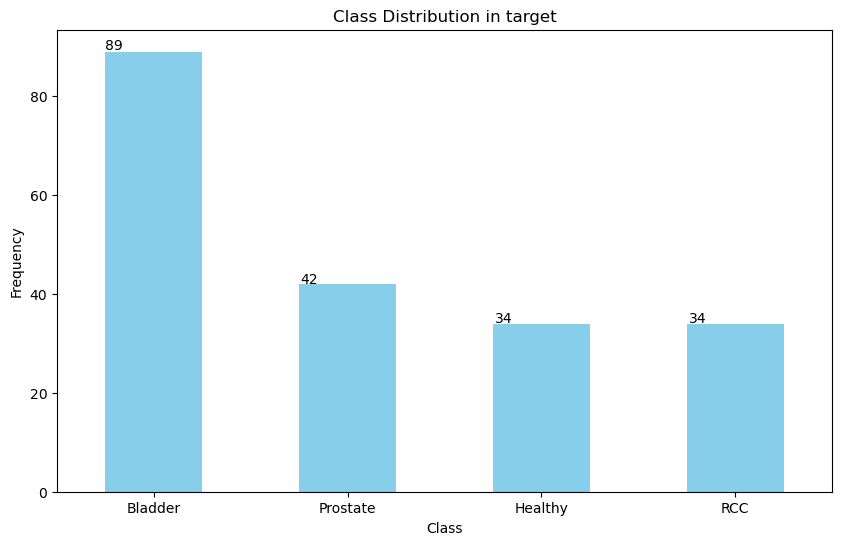

In [14]:

preprocessing.plot_class_distribution(EndMotif_t)

In [15]:


TEST_SIZE = 0.3
CNA_train, CNA_test = preprocessing.stratified_train_test_split(CNA_t_unique, test_size=TEST_SIZE)

Ratio_train, Ratio_test = preprocessing.stratified_train_test_split(Ratio_t, test_size=TEST_SIZE)

EndMotif_train, EndMotif_test = preprocessing.stratified_train_test_split(EndMotif_t, test_size=TEST_SIZE)




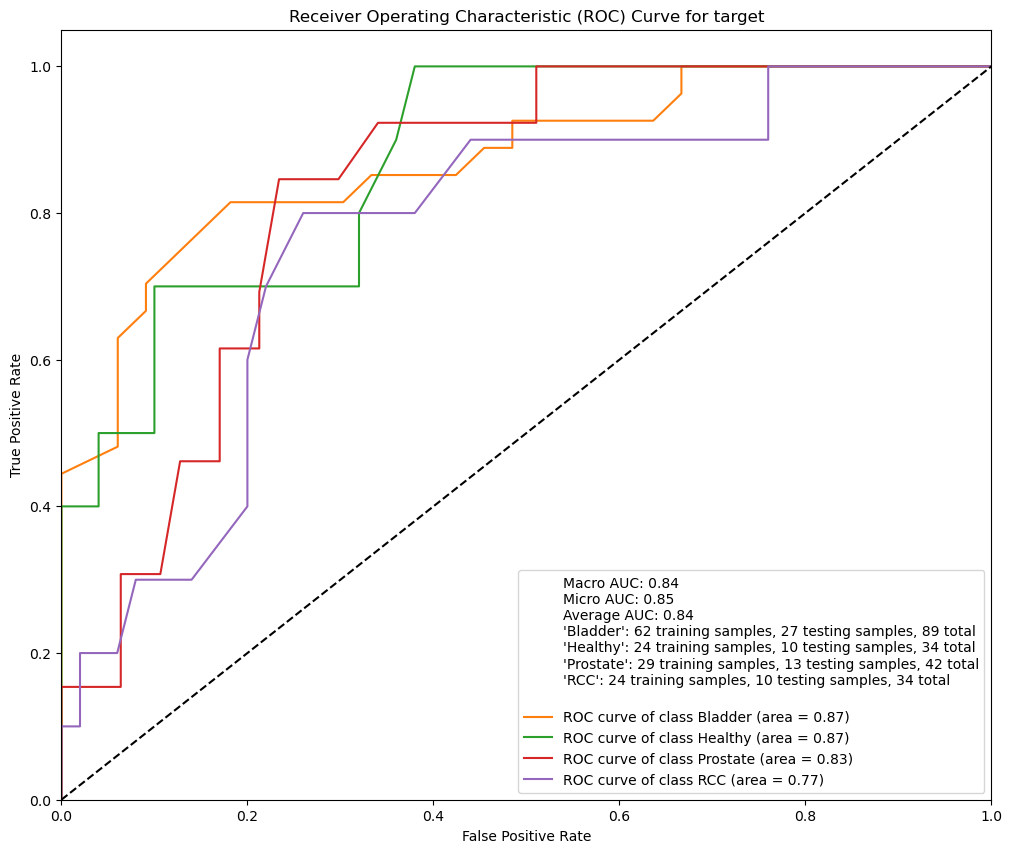

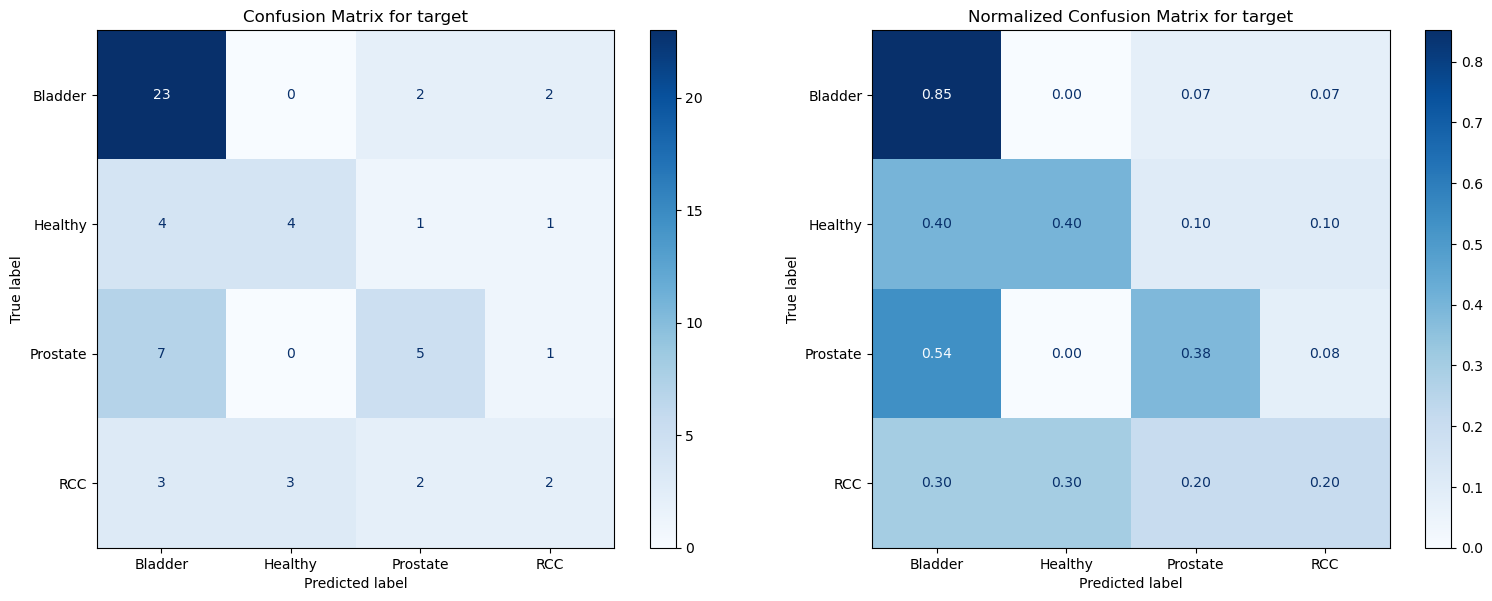

In [16]:
EndMotif_rf = models.train_model(EndMotif_train, EndMotif_test)

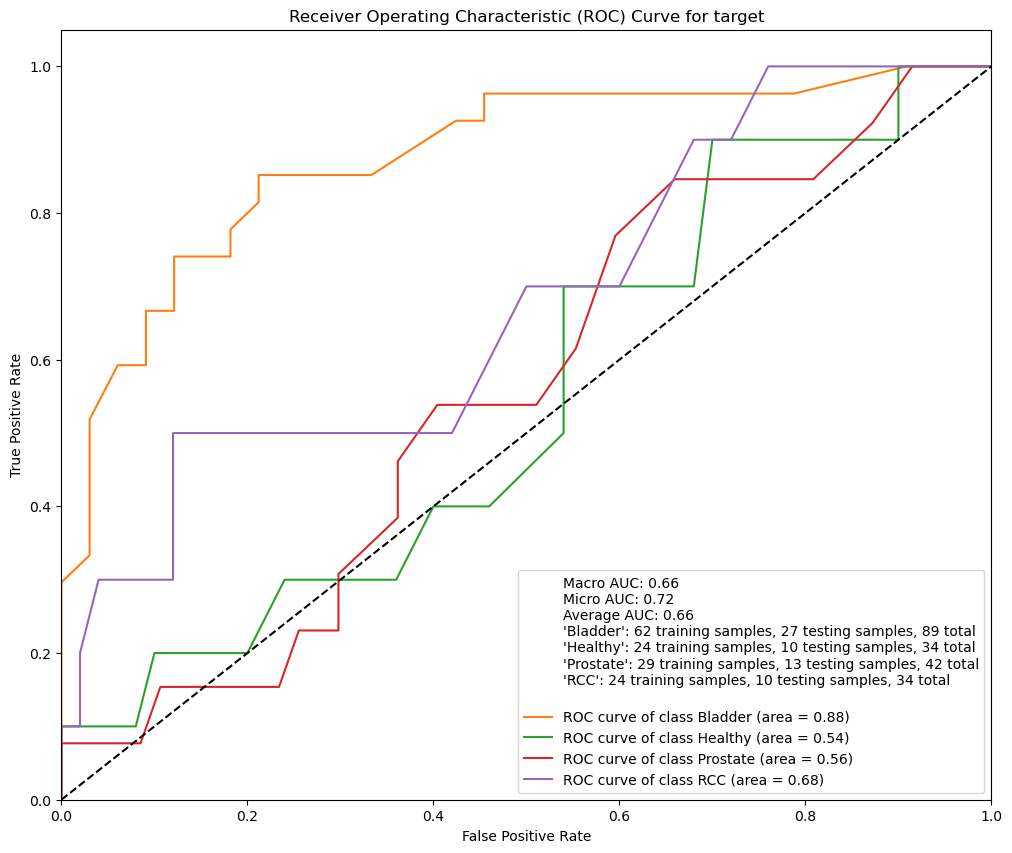

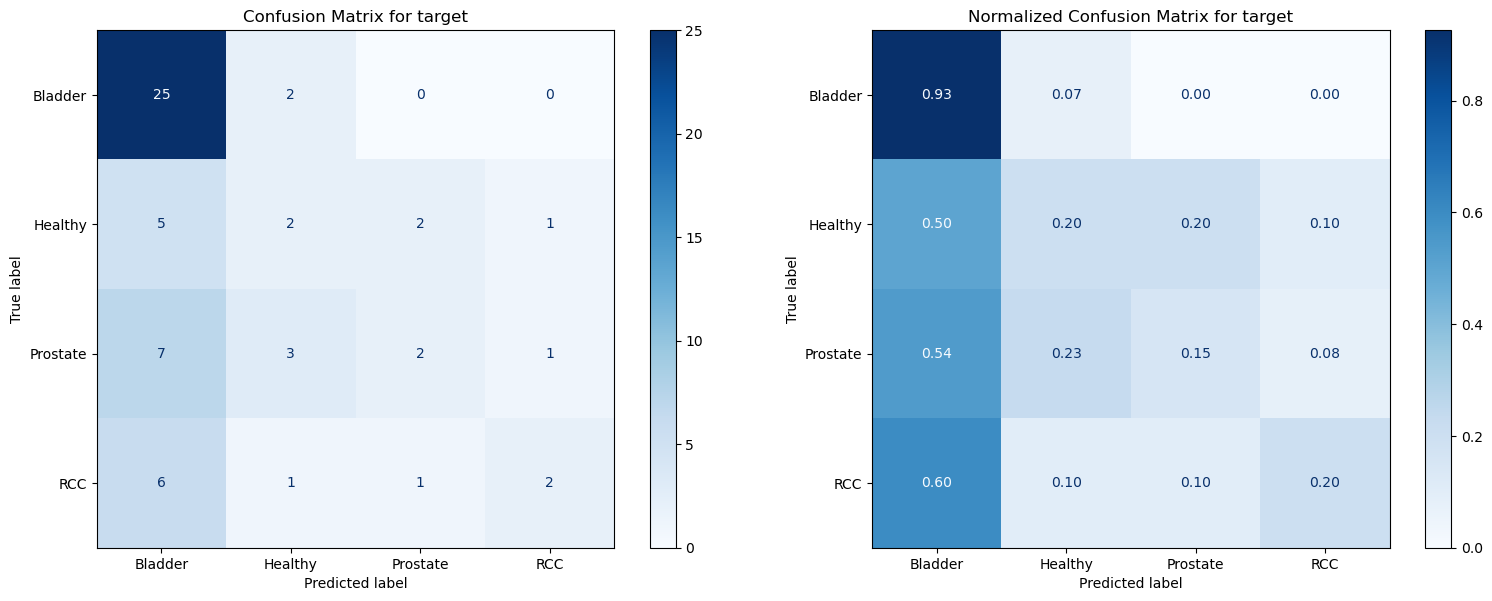

In [17]:
Ratio_rf = models.train_model(Ratio_train, Ratio_test)

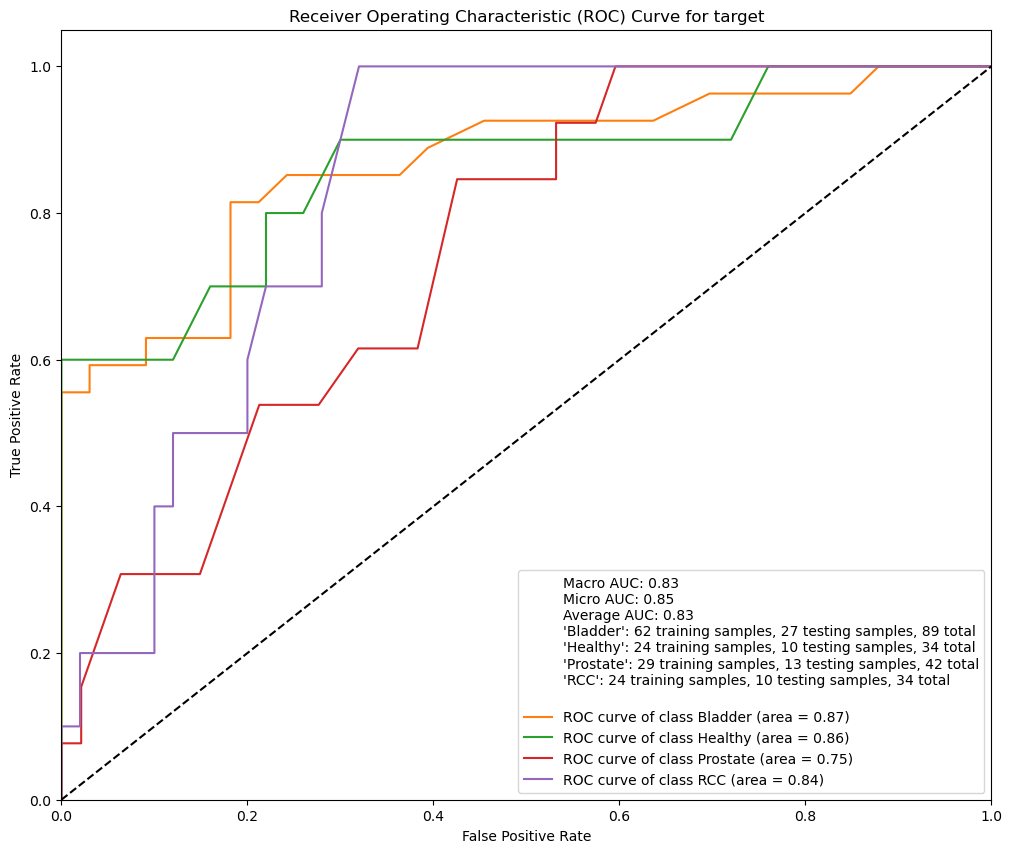

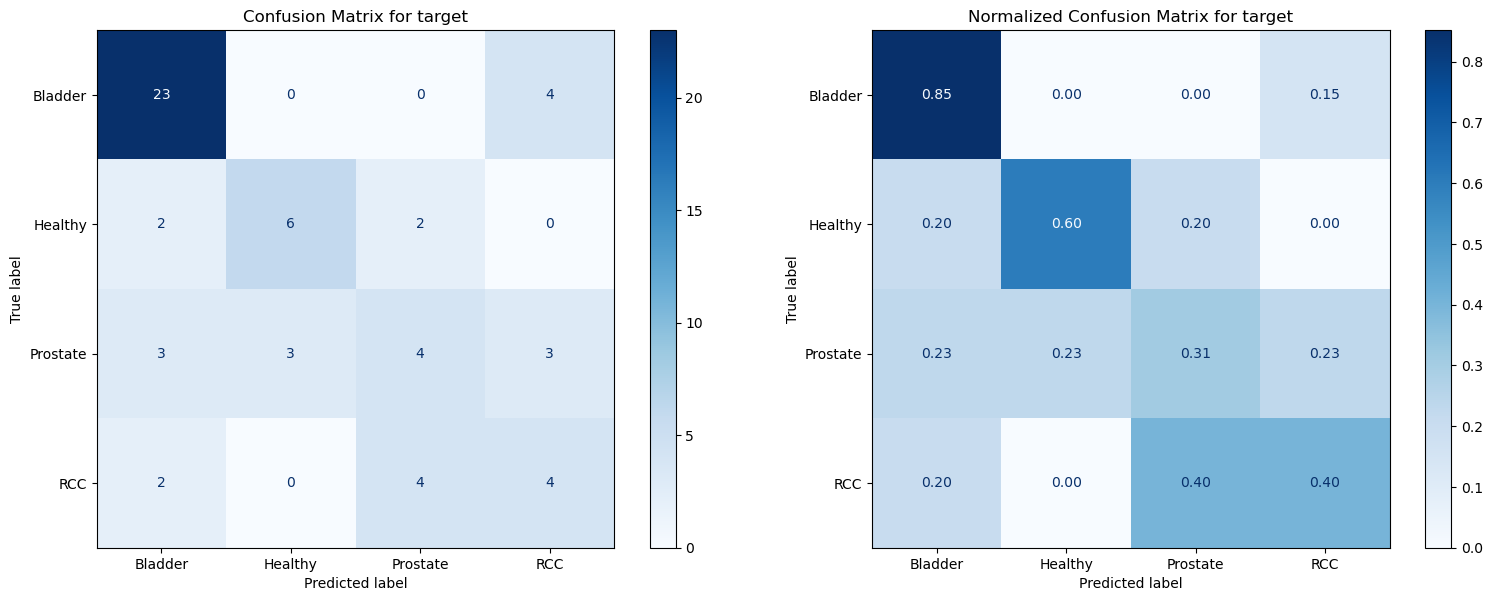

In [18]:
CNA_rf = models.train_model(CNA_train, CNA_test)

# Meta Model

## Combine all features to a single dataframe

In [19]:

CNA_scaled = preprocessing.standardize_dataframe(CNA_t_unique)
Ratio_scaled = preprocessing.standardize_dataframe(Ratio_t)
EndMotif_scaled = preprocessing.standardize_dataframe(EndMotif_t)





# CNA_train, CNA_test = preprocessing.stratified_train_test_split(CNA_t_unique, test_size=TEST_SIZE)

# Ratio_train, Ratio_test = preprocessing.stratified_train_test_split(Ratio_t, test_size=TEST_SIZE)

# EndMotif_train, EndMotif_test = preprocessing.stratified_train_test_split(EndMotif_t, test_size=TEST_SIZE)

display(CNA_scaled.head())

,chr1_p,chr1_q,chr10_p,chr10_q,chr11_p,chr11_q,chr12_p,chr12_q,chr13_q,chr14_q,...,chr5_q,chr6_p,chr6_q,chr7_p,chr7_q,chr8_p,chr8_q,chr9_p,chr9_q,target
58,0.164179,-0.130423,-0.318175,0.322773,0.280854,0.192591,0.013334,-0.349398,0.266444,0.222020,...,0.231214,-0.134385,0.004348,-0.432045,-0.225491,0.278366,-0.459478,0.034870,0.329687,Healthy
73,-0.620955,-0.522345,-0.166593,0.270152,0.655127,0.047986,-0.107933,-0.403349,0.531304,-0.040652,...,0.153366,-0.509217,0.551178,-0.272998,0.063847,0.326145,-0.249466,0.290274,0.366479,Healthy
74,-0.292529,-0.229524,-0.039681,0.146901,0.209783,-0.111516,-0.168020,-0.339986,0.348850,0.108264,...,0.344432,-0.129351,0.233636,-0.309966,-0.192776,0.280717,-0.337149,0.139355,0.180631,Healthy
81,-0.777366,0.059997,-0.384934,0.310081,0.922258,0.305195,-0.576807,-0.422209,0.394544,-0.354728,...,0.231433,-0.868975,0.834052,-0.159071,0.233919,0.476694,-0.130039,0.193406,0.379604,Healthy
83,-0.100752,-0.095488,-0.364775,0.277690,0.400358,0.181864,0.066808,-0.340995,0.302248,0.198495,...,0.544777,-0.135915,0.269652,-0.237871,-0.156826,0.217706,-0.249929,0.210972,0.230735,Healthy


In [20]:
preprocessing.check_scaling(CNA_scaled)

Means:
 chr1_p    -5.579010e-18
chr1_q     8.926416e-18
chr10_p   -3.570567e-17
chr10_q    0.000000e+00
chr11_p   -2.677925e-17
chr11_q    4.463208e-18
chr12_p    1.338962e-17
chr12_q    3.570567e-17
chr13_q    2.677925e-17
chr14_q    1.785283e-17
chr15_q    8.926416e-18
chr16_p    3.570567e-17
chr16_q    1.562123e-17
chr17_p    1.785283e-17
chr17_q   -2.677925e-17
chr18_p    8.926416e-18
chr18_q    1.785283e-17
chr19_p    4.909529e-17
chr2_p    -1.785283e-17
chr2_q    -1.785283e-17
chr20_p    3.570567e-17
chr20_q    2.677925e-17
chr21_q    4.463208e-18
chr22_q    5.076899e-17
chr3_p    -8.926416e-18
chr3_q     1.785283e-17
chr4_p     1.338962e-17
chr4_q     2.677925e-17
chr5_p    -3.570567e-17
chr5_q     3.570567e-17
chr6_p     0.000000e+00
chr6_q     8.926416e-17
chr7_p     8.368515e-18
chr7_q    -1.338962e-17
chr8_p    -1.785283e-17
chr8_q    -1.785283e-17
chr9_p     0.000000e+00
chr9_q     2.677925e-17
dtype: float64
Standard Deviations:
 chr1_p     1.002522
chr1_q     1.002522
chr

(chr1_p    -5.579010e-18
 chr1_q     8.926416e-18
 chr10_p   -3.570567e-17
 chr10_q    0.000000e+00
 chr11_p   -2.677925e-17
 chr11_q    4.463208e-18
 chr12_p    1.338962e-17
 chr12_q    3.570567e-17
 chr13_q    2.677925e-17
 chr14_q    1.785283e-17
 chr15_q    8.926416e-18
 chr16_p    3.570567e-17
 chr16_q    1.562123e-17
 chr17_p    1.785283e-17
 chr17_q   -2.677925e-17
 chr18_p    8.926416e-18
 chr18_q    1.785283e-17
 chr19_p    4.909529e-17
 chr2_p    -1.785283e-17
 chr2_q    -1.785283e-17
 chr20_p    3.570567e-17
 chr20_q    2.677925e-17
 chr21_q    4.463208e-18
 chr22_q    5.076899e-17
 chr3_p    -8.926416e-18
 chr3_q     1.785283e-17
 chr4_p     1.338962e-17
 chr4_q     2.677925e-17
 chr5_p    -3.570567e-17
 chr5_q     3.570567e-17
 chr6_p     0.000000e+00
 chr6_q     8.926416e-17
 chr7_p     8.368515e-18
 chr7_q    -1.338962e-17
 chr8_p    -1.785283e-17
 chr8_q    -1.785283e-17
 chr9_p     0.000000e+00
 chr9_q     2.677925e-17
 dtype: float64,
 chr1_p     1.002522
 chr1_q     

In [21]:
preprocessing.check_scaling(EndMotif_scaled)

Means:
 AAAA   -3.213510e-16
AAAC    3.927623e-16
AAAG   -7.453558e-16
AAAT    1.490712e-15
AACA   -3.213510e-16
            ...     
TTGT    4.195416e-16
TTTA   -3.392038e-16
TTTC    6.382388e-16
TTTG    1.213993e-15
TTTT   -1.517491e-16
Length: 256, dtype: float64
Standard Deviations:
 AAAA    1.002522
AAAC    1.002522
AAAG    1.002522
AAAT    1.002522
AACA    1.002522
          ...   
TTGT    1.002522
TTTA    1.002522
TTTC    1.002522
TTTG    1.002522
TTTT    1.002522
Length: 256, dtype: float64


(AAAA   -3.213510e-16
 AAAC    3.927623e-16
 AAAG   -7.453558e-16
 AAAT    1.490712e-15
 AACA   -3.213510e-16
             ...     
 TTGT    4.195416e-16
 TTTA   -3.392038e-16
 TTTC    6.382388e-16
 TTTG    1.213993e-15
 TTTT   -1.517491e-16
 Length: 256, dtype: float64,
 AAAA    1.002522
 AAAC    1.002522
 AAAG    1.002522
 AAAT    1.002522
 AACA    1.002522
           ...   
 TTGT    1.002522
 TTTA    1.002522
 TTTC    1.002522
 TTTG    1.002522
 TTTT    1.002522
 Length: 256, dtype: float64)

In [22]:
import preprocessing

combined_df = preprocessing.combine_feature_dfs_with_target([(CNA_scaled, 'CNA_'), (Ratio_scaled, 'Ratio_'), (EndMotif_scaled, 'EndMotif_')])

display(combined_df)

,CNA_chr1_p,CNA_chr1_q,CNA_chr10_p,CNA_chr10_q,CNA_chr11_p,CNA_chr11_q,CNA_chr12_p,CNA_chr12_q,CNA_chr13_q,CNA_chr14_q,...,EndMotif_TTCT,EndMotif_TTGA,EndMotif_TTGC,EndMotif_TTGG,EndMotif_TTGT,EndMotif_TTTA,EndMotif_TTTC,EndMotif_TTTG,EndMotif_TTTT,target
58,0.164179,-0.130423,-0.318175,0.322773,0.280854,0.192591,0.013334,-0.349398,0.266444,0.222020,...,0.197153,-0.057297,0.192485,0.171560,-0.172455,0.231276,0.183919,0.137811,-0.516749,Healthy
73,-0.620955,-0.522345,-0.166593,0.270152,0.655127,0.047986,-0.107933,-0.403349,0.531304,-0.040652,...,-0.645750,-0.929711,-0.685266,-0.697214,-0.727915,-1.396516,-1.445943,-1.431984,-1.101461,Healthy
74,-0.292529,-0.229524,-0.039681,0.146901,0.209783,-0.111516,-0.168020,-0.339986,0.348850,0.108264,...,1.196424,0.065826,0.377265,0.173032,0.195749,0.176341,0.691873,0.242351,1.172961,Healthy
81,-0.777366,0.059997,-0.384934,0.310081,0.922258,0.305195,-0.576807,-0.422209,0.394544,-0.354728,...,0.205762,0.202131,0.158323,0.212360,0.344576,-0.078831,-0.355806,-0.091945,-0.278309,Healthy
83,-0.100752,-0.095488,-0.364775,0.277690,0.400358,0.181864,0.066808,-0.340995,0.302248,0.198495,...,-3.605503,-1.163148,-1.222808,0.304764,-1.889923,-1.638597,-2.196061,-1.306621,-2.703262,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBC1317_UC1,0.102384,0.072609,-0.037326,-0.065765,-0.129486,0.314885,-0.185241,-0.260999,-0.008180,0.124663,...,0.418370,0.995647,0.324533,0.246726,0.700759,0.685258,0.758893,0.999342,0.706237,Bladder
WBC1318_UC1,-0.040372,-0.164940,-0.091891,0.126565,0.238508,-0.068976,-0.074235,-0.258241,0.176798,0.114883,...,-0.297500,-0.190838,-0.240593,-0.069499,0.217503,-0.313020,-0.326095,-0.078271,-0.090990,Bladder
WBC1320_UC1,-0.198295,-0.255855,-0.182921,0.194002,0.324511,0.068579,-0.029703,-0.190839,0.149855,0.149738,...,4.242058,5.916170,4.889620,6.357015,7.354219,1.055087,1.244854,2.280086,-0.103178,Bladder
WBC1322_UC1,-0.751607,-0.654504,-0.393806,-0.127811,0.031741,-0.309695,-0.332935,-0.544062,-0.210276,-0.065035,...,-1.169695,-0.667715,-0.905769,-0.943792,-1.340325,-1.348947,-1.297180,-1.000515,-0.331501,Bladder


In [23]:
# Assuming 'combined_df' is the DataFrame you've generated
# Split the DataFrame using the predefined function
train_df, test_df = preprocessing.stratified_train_test_split(combined_df, test_size=TEST_SIZE)

# Extract the feature subsets by prefix from train_df and test_df
CNA_train_df = preprocessing.filter_columns_by_prefix(train_df, 'CNA_')
Ratio_train_df = preprocessing.filter_columns_by_prefix(train_df, 'Ratio_')
EndMotif_train_df = preprocessing.filter_columns_by_prefix(train_df, 'EndMotif_')

CNA_test_df = preprocessing.filter_columns_by_prefix(test_df, 'CNA_')
Ratio_test_df = preprocessing.filter_columns_by_prefix(test_df, 'Ratio_')
EndMotif_test_df = preprocessing.filter_columns_by_prefix(test_df, 'EndMotif_')



In [24]:
display(EndMotif_train_df)

,EndMotif_AAAA,EndMotif_AAAC,EndMotif_AAAG,EndMotif_AAAT,EndMotif_AACA,EndMotif_AACC,EndMotif_AACG,EndMotif_AACT,EndMotif_AAGA,EndMotif_AAGC,...,EndMotif_TTCT,EndMotif_TTGA,EndMotif_TTGC,EndMotif_TTGG,EndMotif_TTGT,EndMotif_TTTA,EndMotif_TTTC,EndMotif_TTTG,EndMotif_TTTT,target
PB210_UC1,-2.690933,-0.146940,-1.395667,0.180670,0.862025,1.356079,2.923812,3.980524,-1.863450,0.487628,...,-1.162777,0.219847,0.248148,-0.187016,-0.425037,-0.751257,-0.412130,-0.393471,-1.878912,Prostate
NU16,-1.847352,-0.742992,-0.752218,-0.890274,-0.816679,0.118708,0.121953,-0.187713,-0.339826,1.219243,...,0.361594,0.264453,0.498474,0.498113,0.407662,-0.287140,-0.015757,0.856602,-1.352863,Healthy
BC020_UC1,1.355034,0.120884,0.153023,0.442238,-0.438579,-0.390992,0.123196,-0.102911,0.610597,-0.267438,...,1.121730,0.873620,0.134718,0.063874,0.249281,1.709430,1.456716,1.132388,1.674998,Bladder
RCC008_UC1,0.340485,-0.241837,0.293243,-0.101053,-0.432047,-0.107020,0.687529,-0.314915,0.704000,0.233781,...,1.035271,0.415394,0.606260,0.371700,0.567565,0.409909,0.707822,0.273099,0.457234,RCC
WBC1104_UC1,-0.635857,-0.307840,-0.484664,-0.831399,-0.528734,0.162572,0.437348,-0.171390,-0.435696,0.466783,...,-0.408472,0.127125,0.397113,0.337269,0.095957,-0.750396,-0.443414,0.220024,-0.635744,Bladder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBC1182_UC1,1.655853,-1.589896,-1.706794,-1.896801,-1.652941,0.150526,2.191926,-1.341007,-0.413298,-0.757315,...,0.553716,1.623751,2.128554,2.084232,1.119447,-0.479392,0.039047,0.647769,2.754880,Bladder
WBC1105_UC1,-0.757513,-0.096354,-0.894411,-1.024262,-0.398403,0.722868,1.695031,0.090478,-0.872111,0.184781,...,-0.336315,1.777468,1.855870,1.993390,1.341082,-0.659041,-0.227311,1.161669,-0.490284,Bladder
NU103,3.054593,-0.409472,-0.938688,-0.238925,1.477381,-2.121528,-1.183940,-0.760811,-1.403109,-2.728812,...,-1.377977,-0.525042,-1.055532,-1.356123,0.517004,-0.355697,-0.795055,-1.240422,3.043388,Healthy
WBC1312_UC1,-0.197810,-0.703215,-1.262739,-0.941276,-0.533153,-0.633723,0.105016,-0.348489,-1.746604,-1.052243,...,-1.079538,0.991753,0.342549,0.171562,0.298711,-0.456153,-0.410354,0.324756,-0.001290,Bladder


In [25]:
display(CNA_train_df)

,CNA_chr1_p,CNA_chr1_q,CNA_chr10_p,CNA_chr10_q,CNA_chr11_p,CNA_chr11_q,CNA_chr12_p,CNA_chr12_q,CNA_chr13_q,CNA_chr14_q,...,CNA_chr5_q,CNA_chr6_p,CNA_chr6_q,CNA_chr7_p,CNA_chr7_q,CNA_chr8_p,CNA_chr8_q,CNA_chr9_p,CNA_chr9_q,target
PB210_UC1,-0.573814,-0.713541,-0.048668,0.634091,0.142371,0.144318,0.094518,-0.440467,0.674030,-0.185594,...,0.304778,-0.137047,0.871294,-0.204139,-0.035472,0.143214,-0.199688,0.346732,0.158759,Prostate
NU16,0.371485,-0.434472,-0.489411,0.353705,0.395100,0.225185,-0.392697,-0.367090,0.144047,0.277156,...,-0.026692,-0.554413,-0.127423,-0.467729,-0.411422,0.370852,-0.453343,0.011396,0.474506,Healthy
BC020_UC1,-0.410119,-0.365723,-0.001011,0.300331,0.268017,0.103518,-0.065385,-0.146880,0.305529,-0.031610,...,0.323383,-0.270610,0.249838,-0.214305,-0.199101,0.361159,-0.312399,0.097270,0.024594,Bladder
RCC008_UC1,0.069789,0.011228,-0.058651,-0.229617,0.187927,0.063824,-0.020173,-0.071081,-0.079508,0.115165,...,0.355527,-0.140198,0.047257,0.547213,0.641108,0.353944,-0.323344,-0.333580,-0.315610,RCC
WBC1104_UC1,0.285586,-0.034209,-0.262104,0.219618,0.225148,0.291087,-0.254686,-0.245976,-0.114381,0.282288,...,0.206085,-0.247400,-0.129343,-0.432093,-0.417057,0.367760,-0.383198,0.033598,0.383073,Bladder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBC1182_UC1,7.312798,5.476520,7.139818,-1.581184,-6.378459,-3.475730,1.680326,2.416508,-4.376593,1.076891,...,-6.202261,-0.722646,-1.885147,1.928233,-2.287261,-5.538737,3.897437,-1.465964,1.988066,Bladder
WBC1105_UC1,-0.376430,-0.154330,0.148713,-0.129950,-0.006445,0.389545,-0.232780,-0.398659,0.252606,-0.001741,...,0.091418,-0.173815,0.567001,-0.691651,-0.174411,0.161279,-0.399624,0.003335,-0.142327,Bladder
NU103,0.284424,-0.310009,0.250139,0.085571,0.101907,-0.016104,-0.038630,-0.047314,-0.412318,0.515266,...,0.302825,-0.023489,-0.385622,-0.490769,-0.388418,0.478104,-0.433094,-0.121642,0.402891,Healthy
WBC1312_UC1,-0.251242,-0.262315,-0.123997,0.130749,0.311549,-0.053897,-0.053110,-0.320136,0.248292,0.243956,...,0.379835,-0.149302,0.233105,-0.242311,-0.364427,0.450312,-0.246664,0.191708,0.184801,Bladder


Best hyperparameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


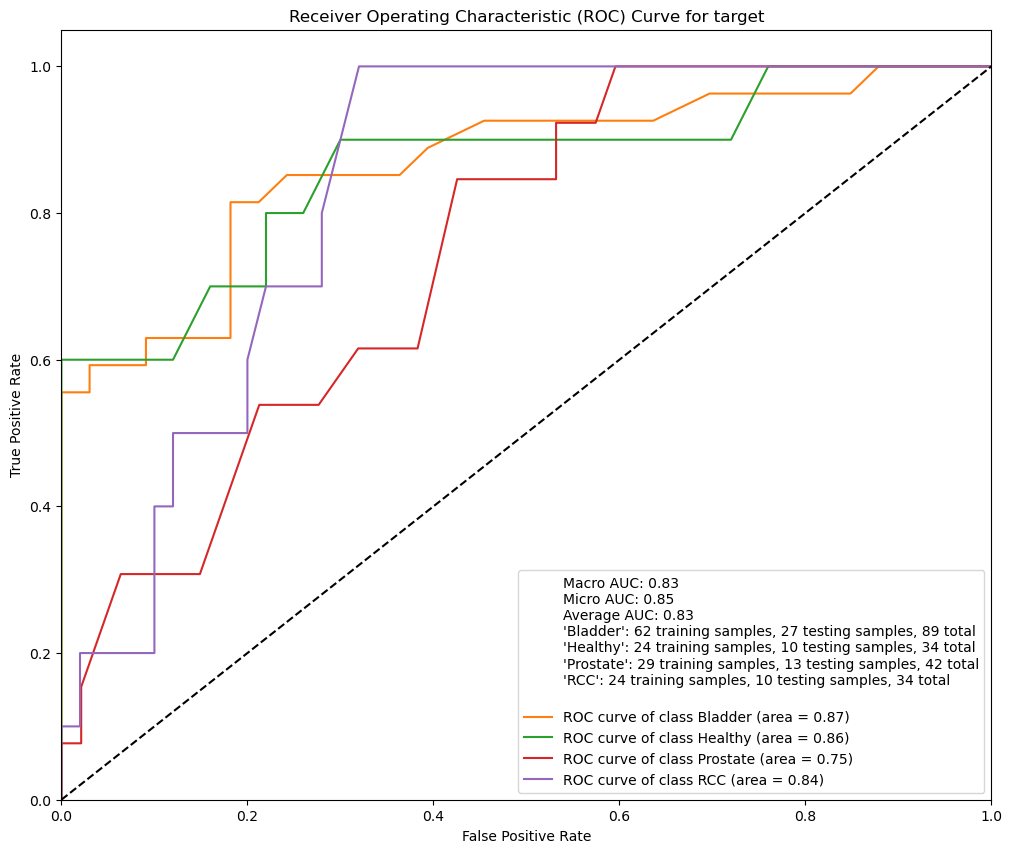

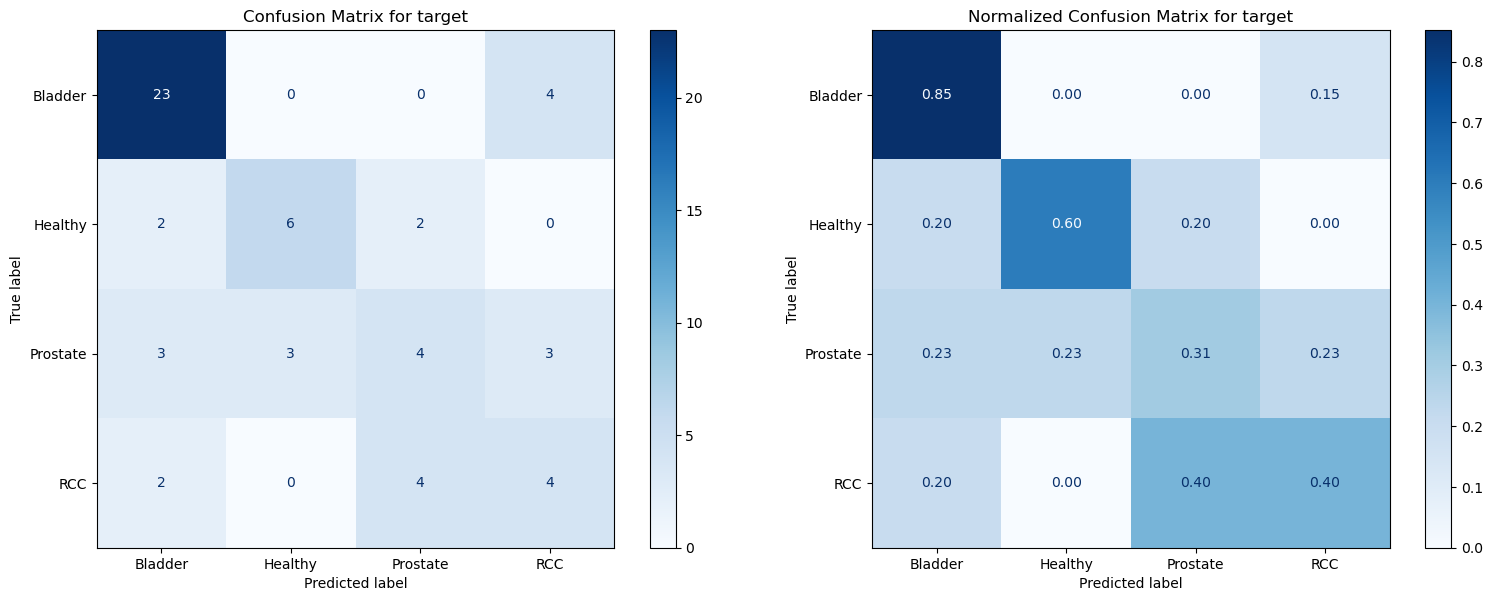

Best hyperparameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 5000}


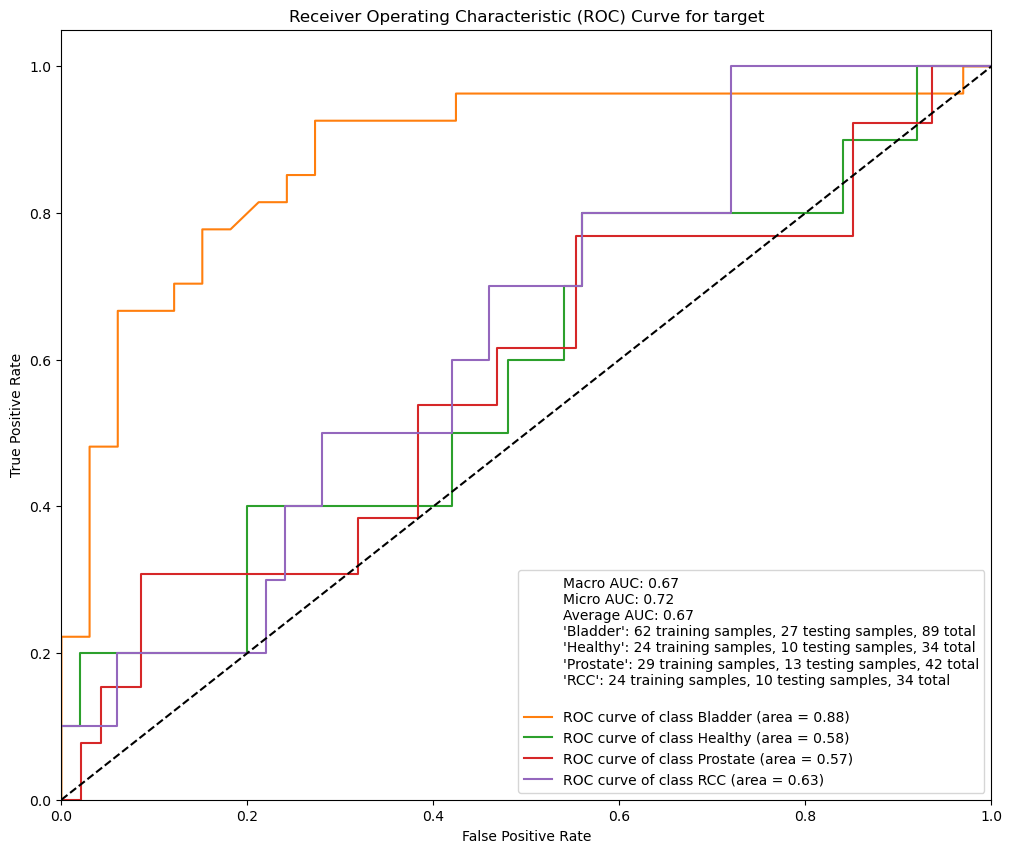

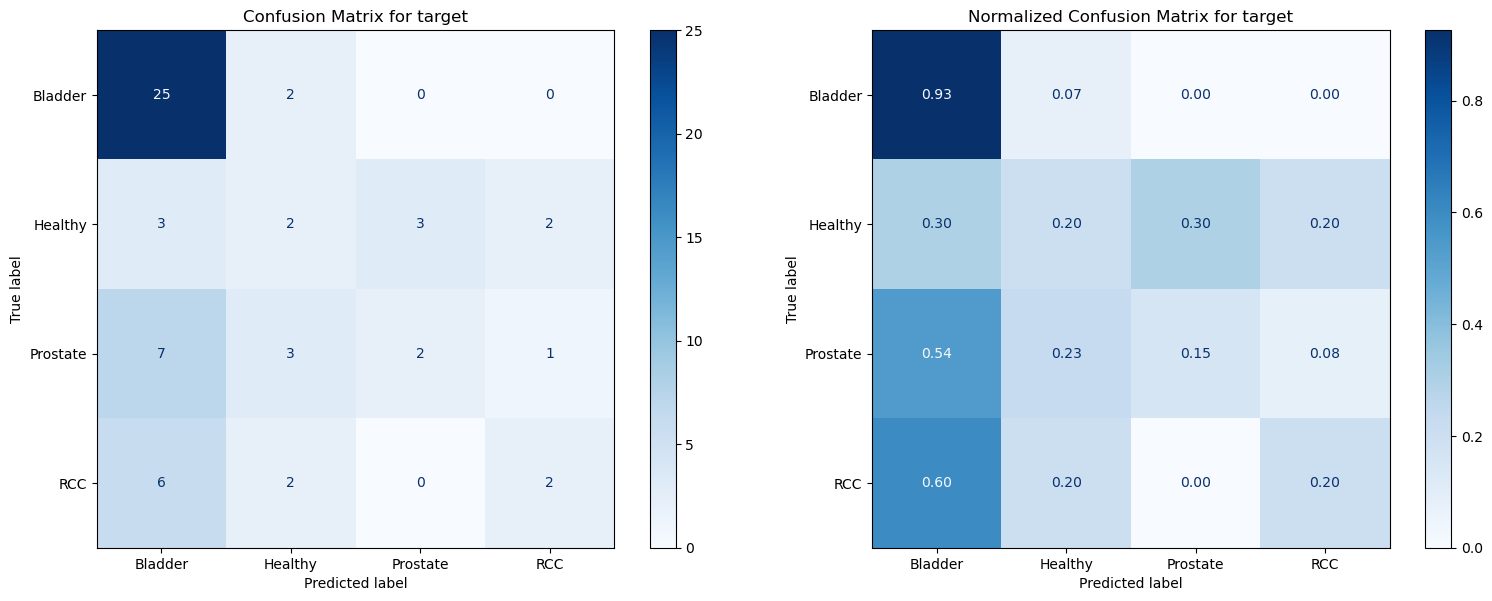

Best hyperparameters found: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 5000}


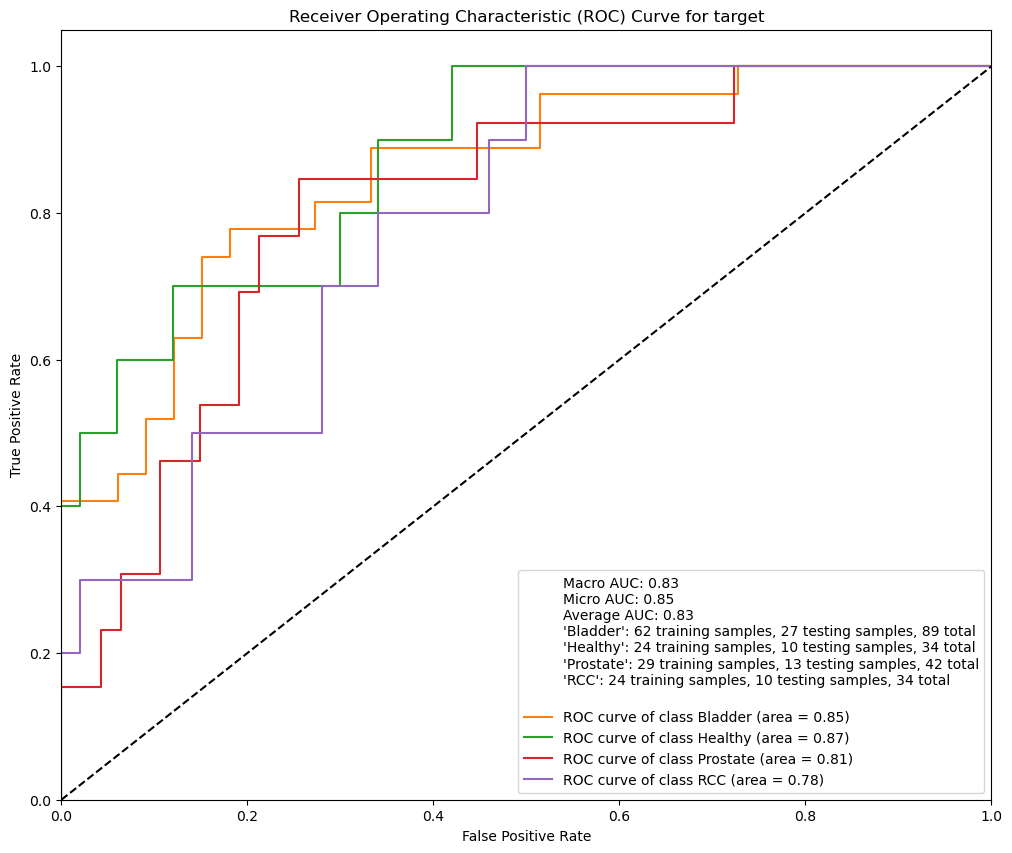

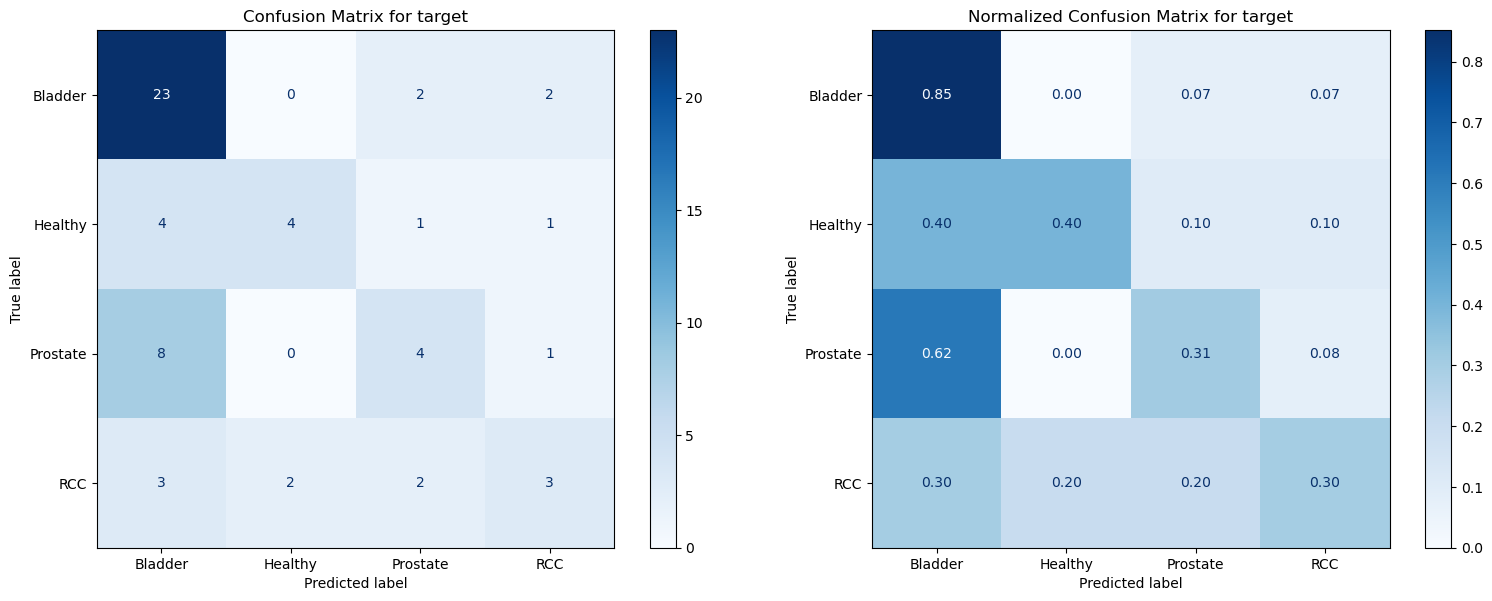

In [26]:
# # Train the models on their respective feature subsets using your train_model( function
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 500, 1000, 5000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


model_CNA = models.train_model(CNA_train_df, CNA_test_df, model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')
model_Ratio = models.train_model(Ratio_train_df, Ratio_test_df,  model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')
model_EndMotif = models.train_model(EndMotif_train_df, EndMotif_test_df,  model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')



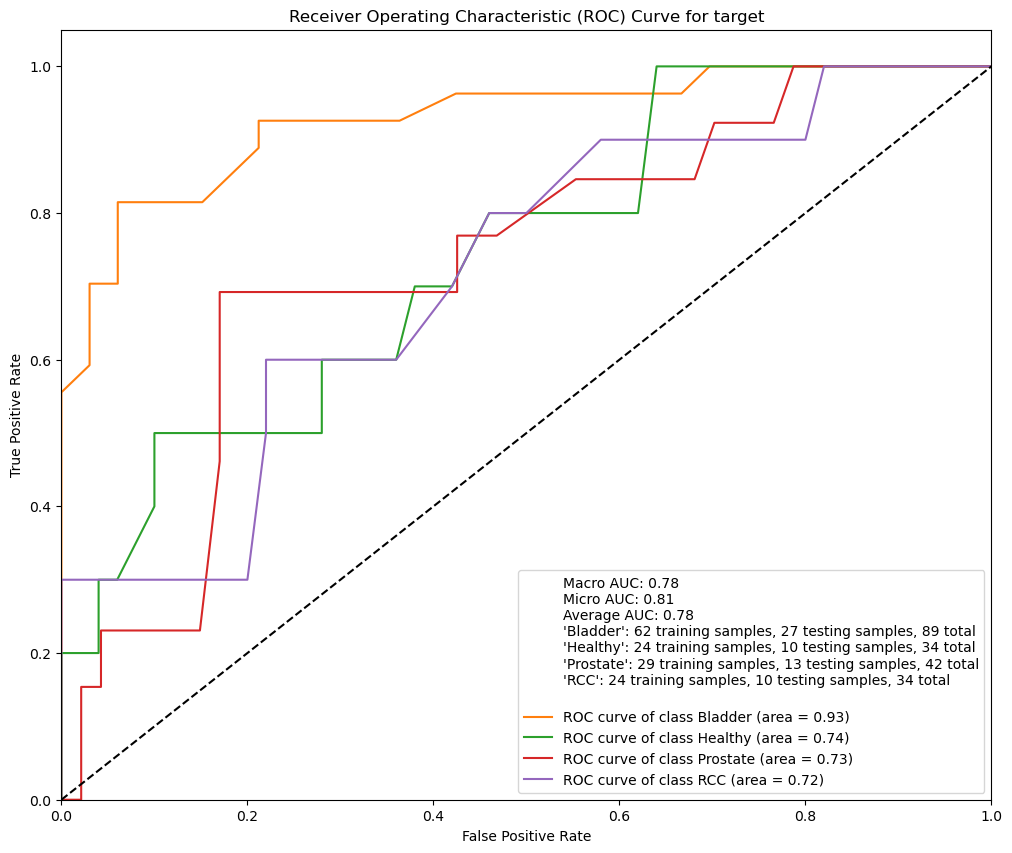

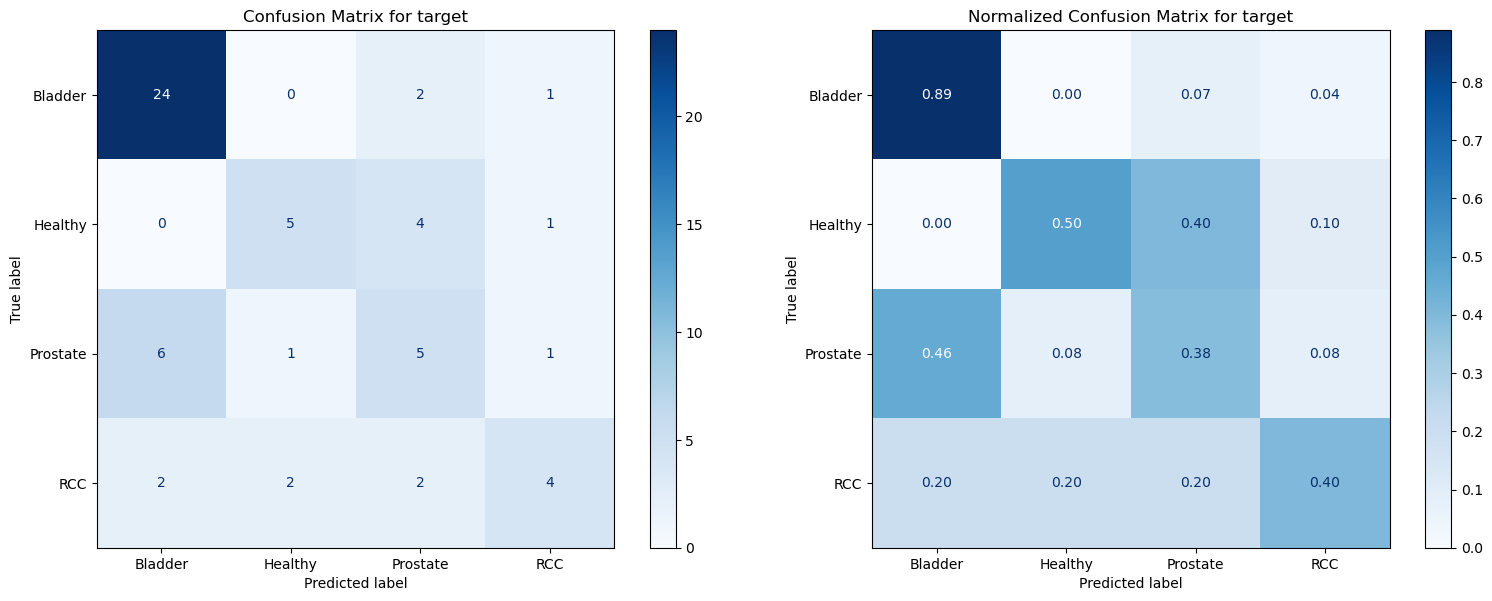

RandomForestClassifier(class_weight='balanced', random_state=0)

In [27]:
models.train_model(train_df, test_df)

Best hyperparameters found: {'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}


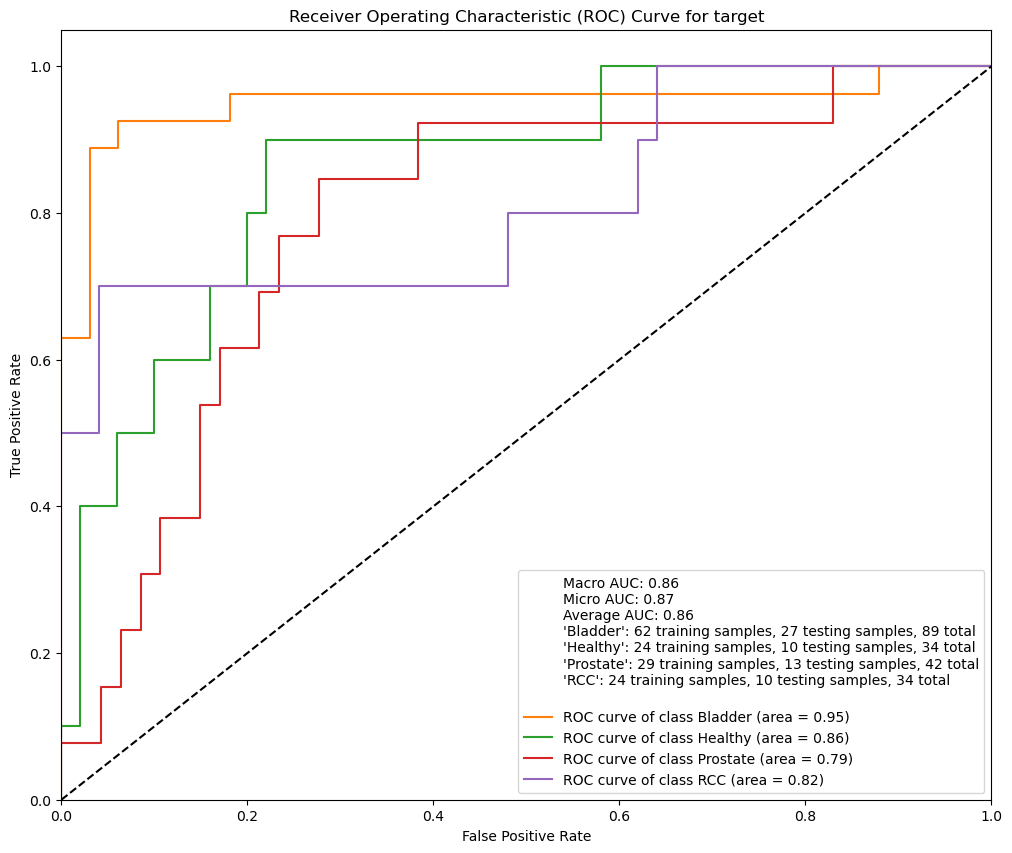

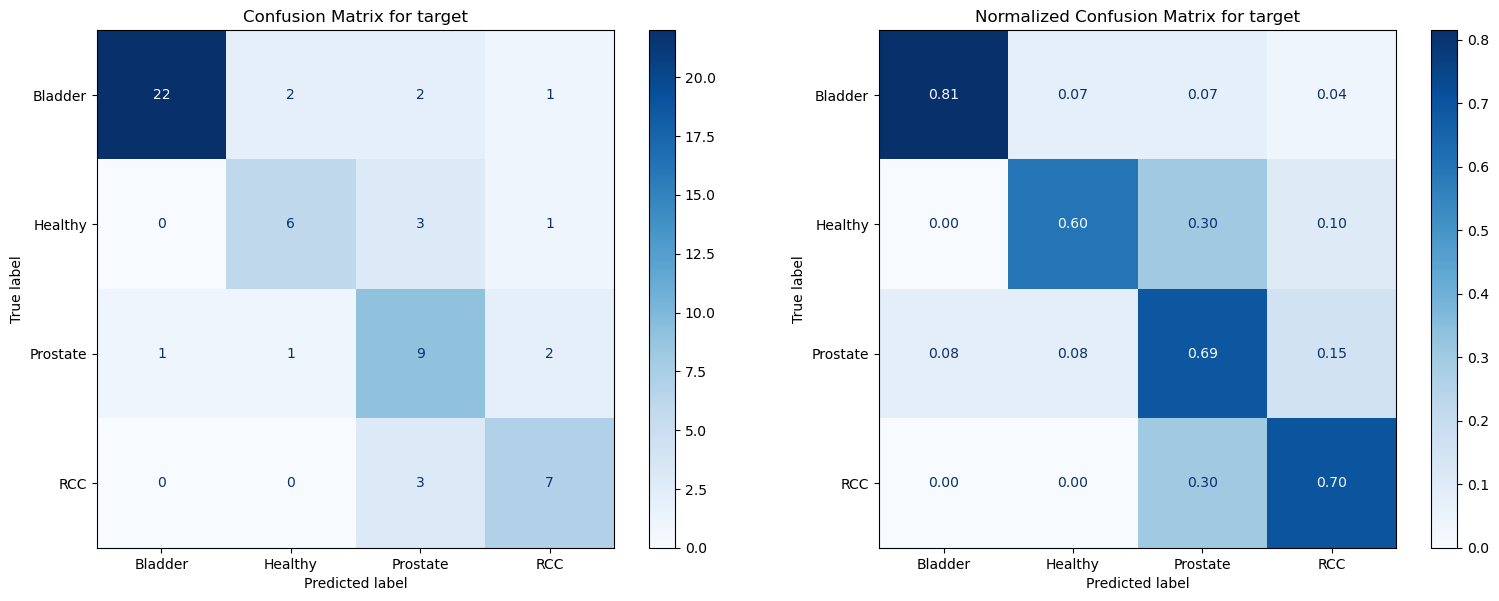

In [28]:

param_grid_log_reg = [
    {
        'penalty': ['l2'],         # 'lbfgs' only supports 'l2'
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs'],       # Only 'lbfgs' here
        'max_iter': [200, 500, 1000]
    },
    {
        'penalty': ['l1', 'l2'],   # 'liblinear' supports 'l1' and 'l2'
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear'],   # Only 'liblinear' here
        'max_iter': [200, 500, 1000]
    },
    {
        'penalty': ['l1', 'l2', 'elasticnet'],  # 'saga' supports all three penalties
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],         # Only 'saga' here
        'max_iter': [200, 500, 1000],
        'l1_ratio': [0.5]           # Only relevant when 'penalty' is 'elasticnet'
    }
]




#log_reg_model = LogisticRegression(max_iter=1000, random_state=0, class_weight='balanced')




# Train with LogisticRegression and hyperparameter tuning using GridSearchCV
trained_log_reg_model = models.train_model(
        train_df, 
        test_df, 
        target_name='target', 
        model=LogisticRegression(random_state=0, class_weight='balanced'), 
        param_grid=param_grid_log_reg, 
        cv=5, 
        scoring='roc_auc_micro',
        search_method='grid'
)



Best hyperparameters found: {'C': 100, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}


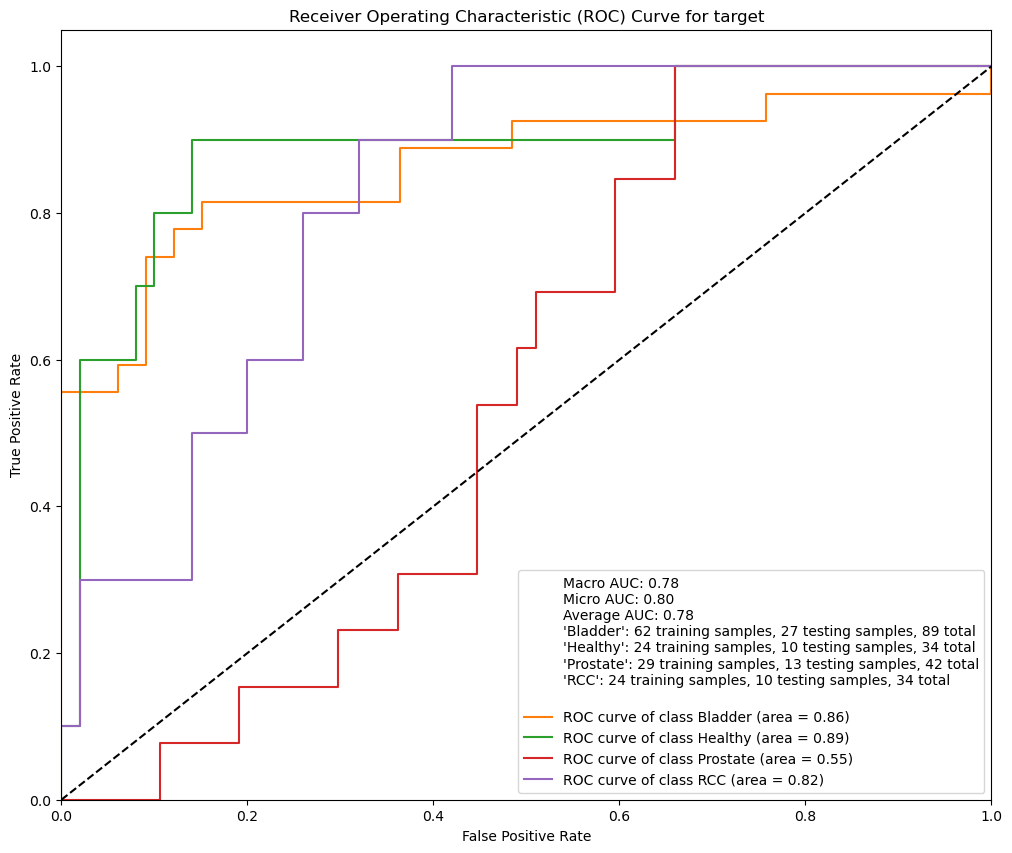

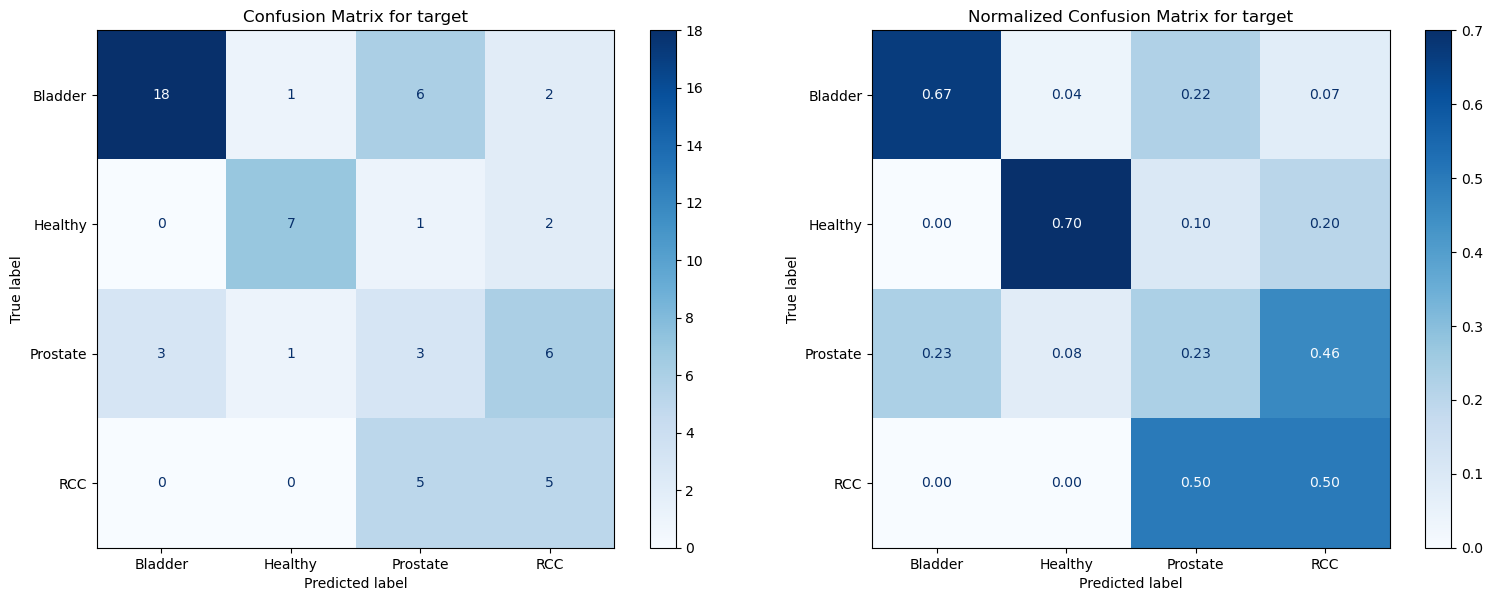

LogisticRegression(C=100, class_weight='balanced', max_iter=200, penalty='l1',
                   random_state=0, solver='liblinear')

In [29]:





models.train_model(CNA_train_df, CNA_test_df, model=LogisticRegression(random_state=0, class_weight='balanced'), 
            param_grid=param_grid_log_reg, 
            cv=5, 
            scoring='balanced_accuracy',
            search_method='grid')
    



Best hyperparameters found: {'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}


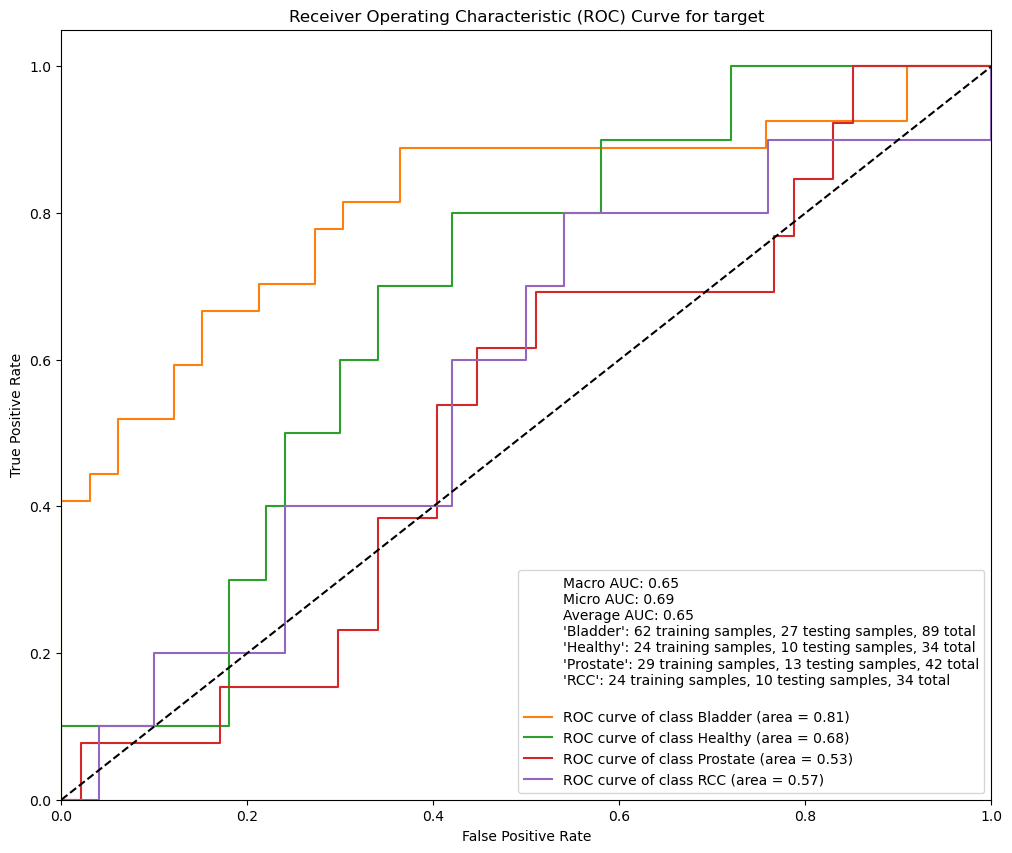

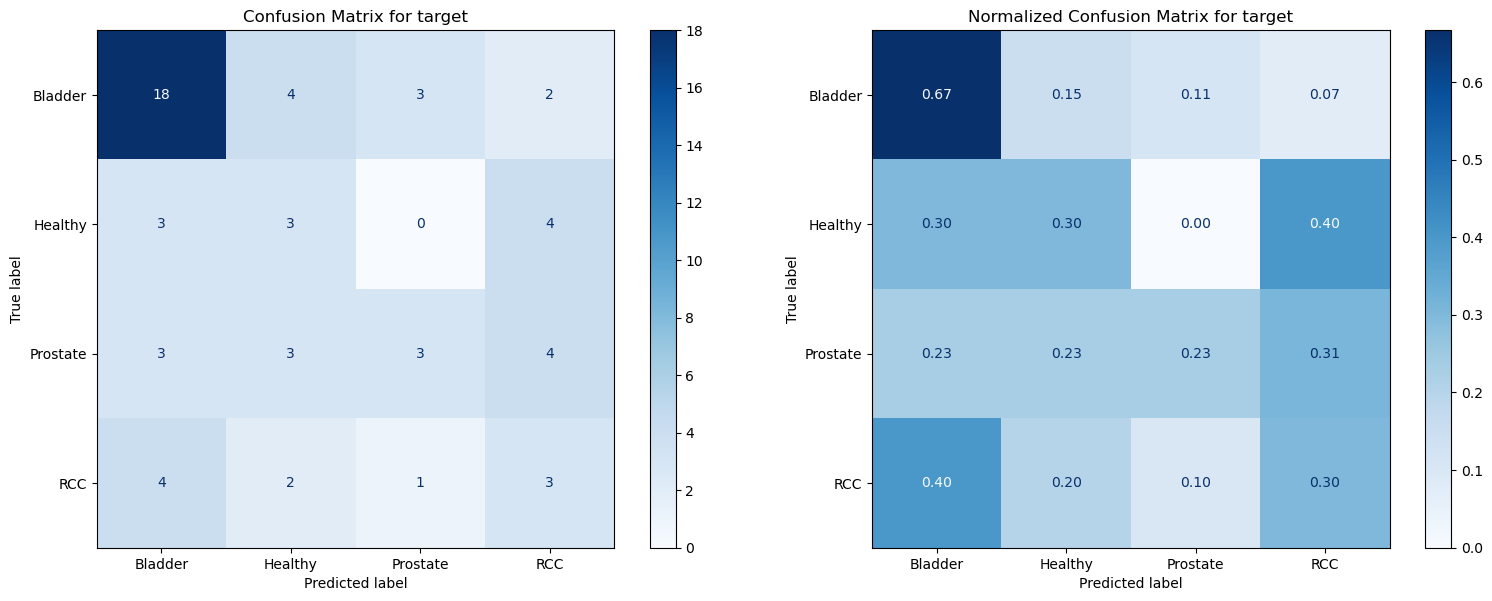

LogisticRegression(C=1, class_weight='balanced', max_iter=200, random_state=0,
                   solver='liblinear')

In [30]:


models.train_model(Ratio_train_df, Ratio_test_df, model=LogisticRegression(random_state=0, class_weight='balanced'), 
            param_grid=param_grid_log_reg, 
            cv=5, 
            scoring='balanced_accuracy',
            search_method='grid')

/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which mea

Best hyperparameters found: {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}


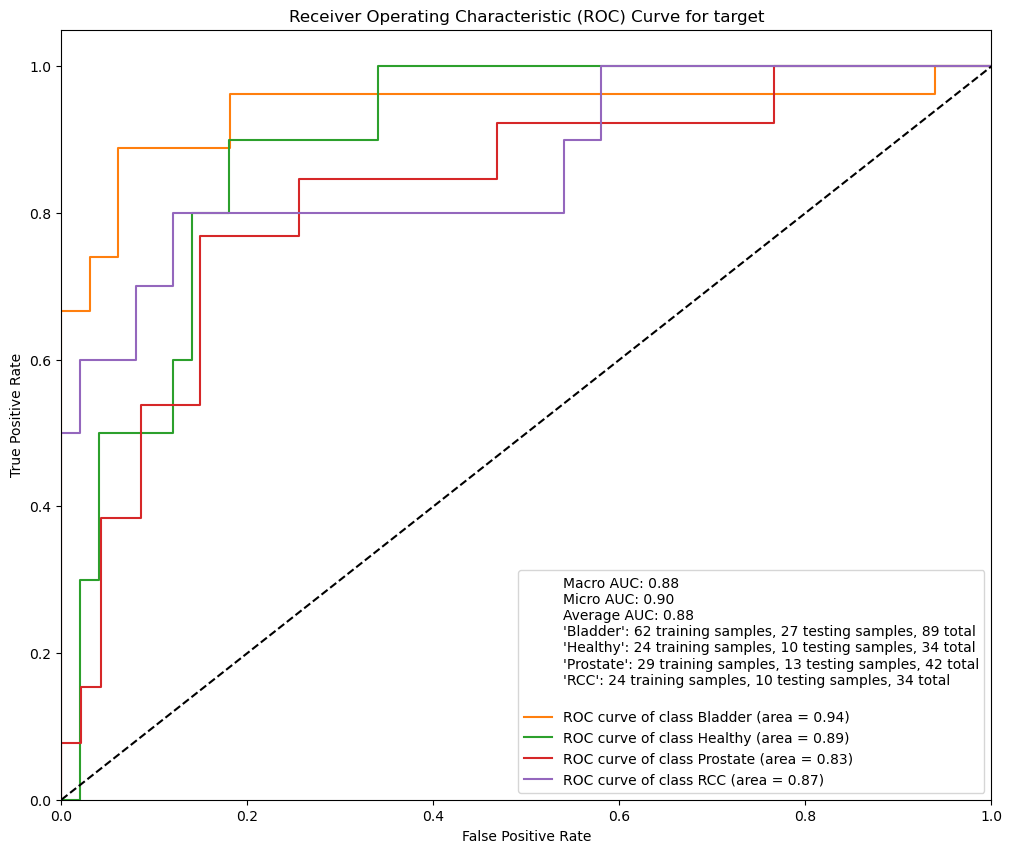

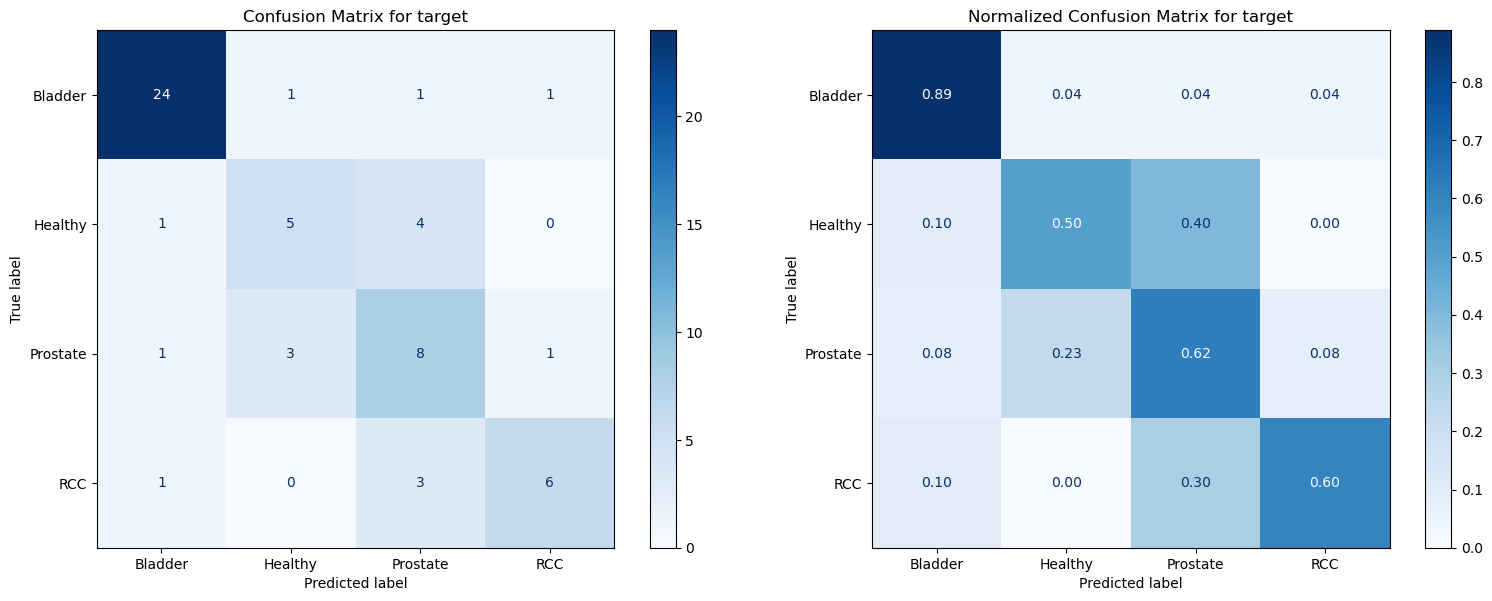

LogisticRegression(C=10, class_weight='balanced', max_iter=200, random_state=0,
                   solver='liblinear')

In [31]:
models.train_model(EndMotif_train_df, EndMotif_test_df, model=LogisticRegression(random_state=0, class_weight='balanced'), 
            param_grid=param_grid_log_reg, 
            cv=5, 
            scoring='roc_auc_macro',
            search_method='grid')

/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is

Best hyperparameters found: {'C': 100, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}


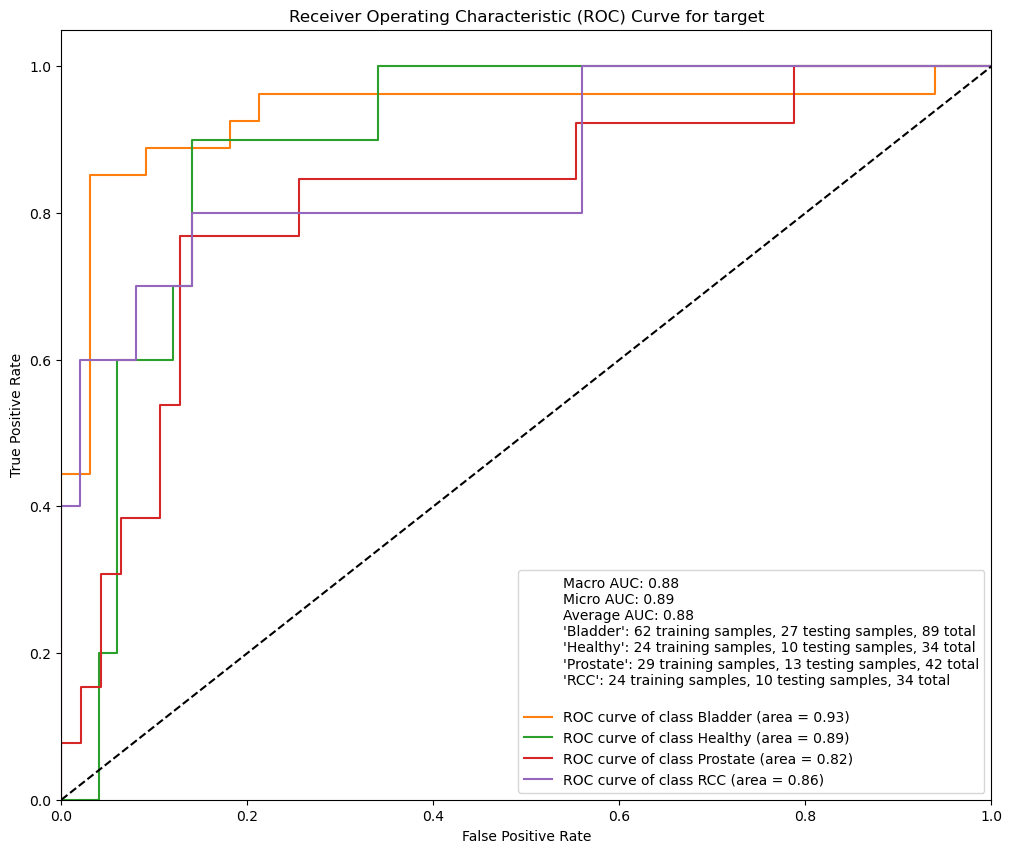

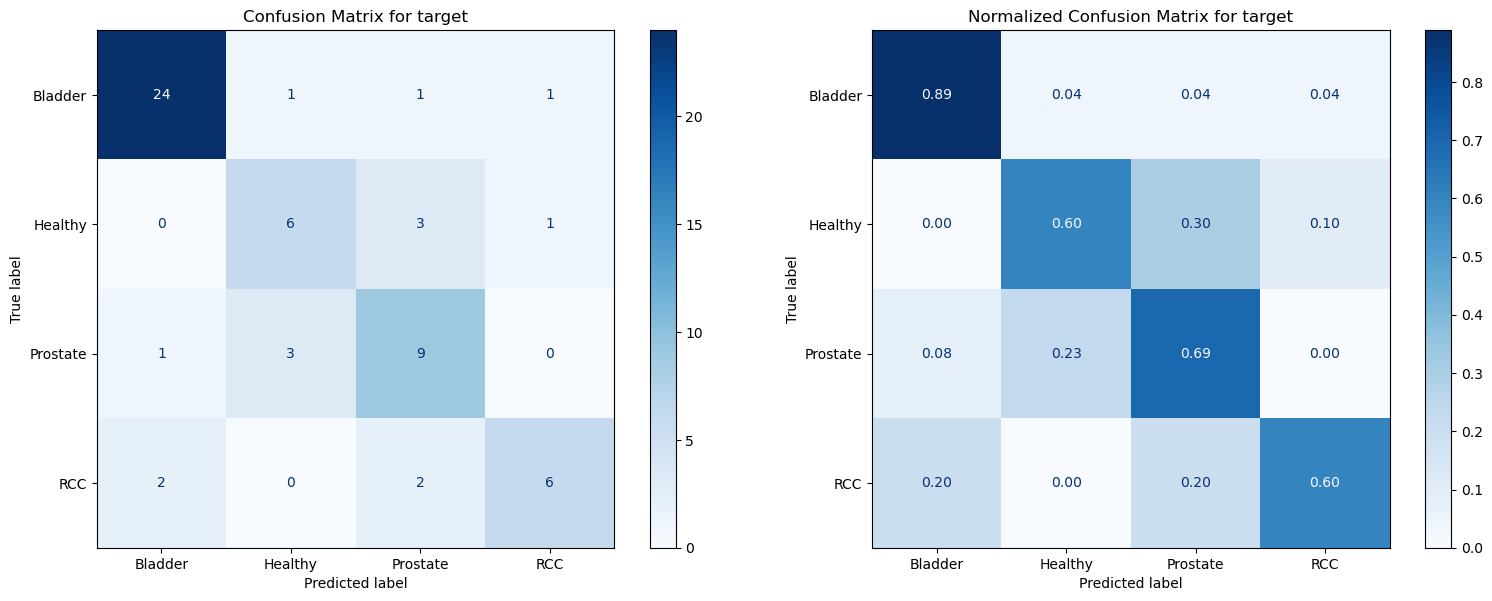

LogisticRegression(C=100, class_weight='balanced', max_iter=200, random_state=0,
                   solver='liblinear')

In [32]:

models.train_model(EndMotif_train_df, EndMotif_test_df, model=LogisticRegression(random_state=0, class_weight='balanced'), 
            param_grid=param_grid_log_reg, 
            cv=5, 
            scoring='balanced_accuracy',
            search_method='grid')

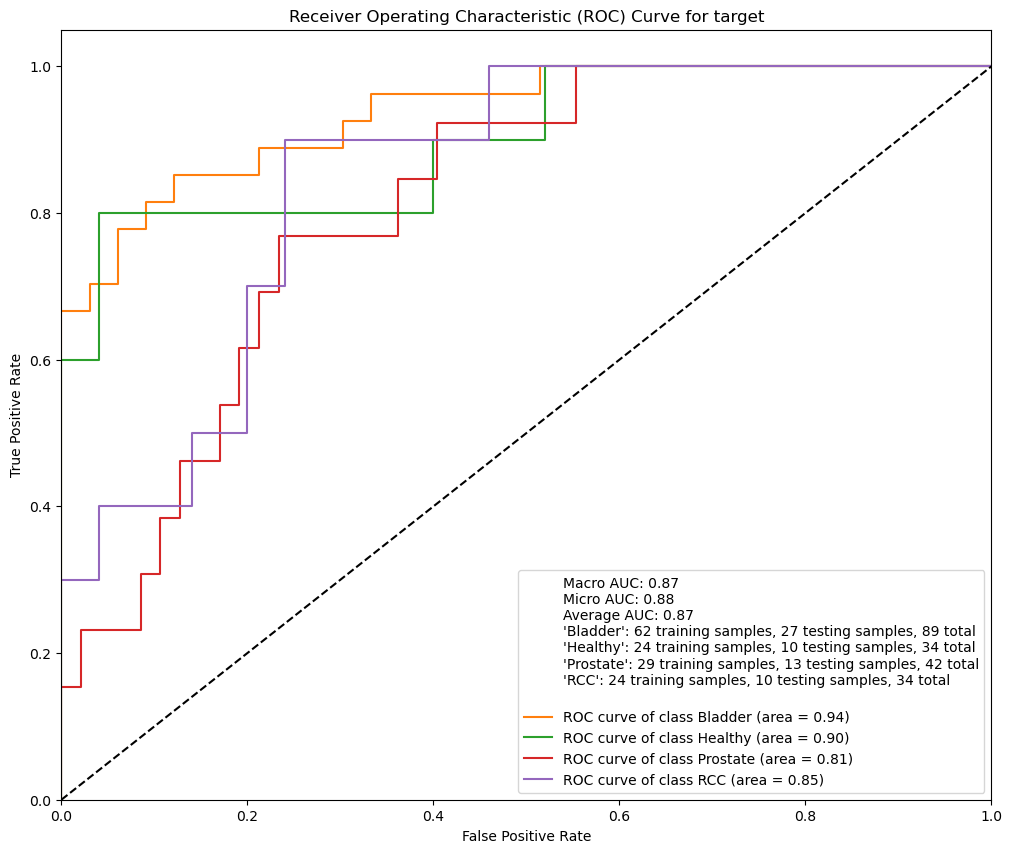

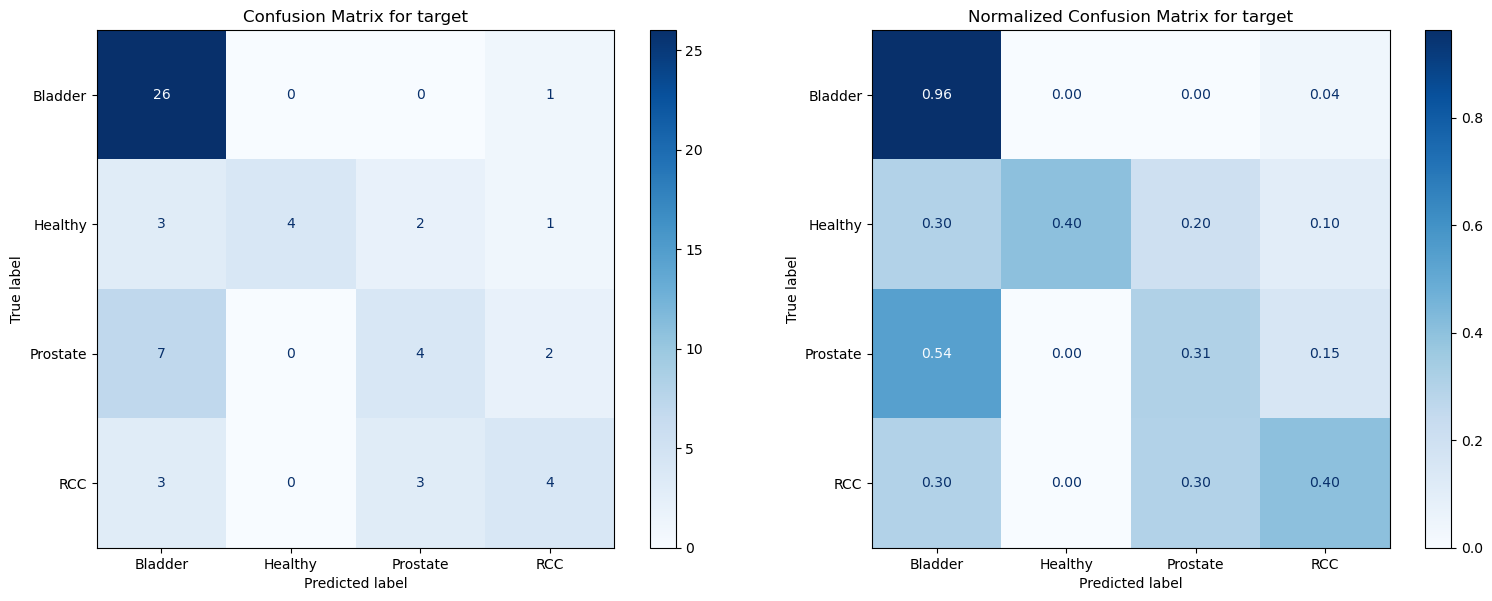

In [33]:
base_models = [model_CNA, model_Ratio, model_EndMotif]
train_dfs = [CNA_train_df, Ratio_train_df, EndMotif_train_df]
test_dfs = [CNA_test_df, Ratio_test_df, EndMotif_test_df]

meta_classifier = models.train_meta_classifier(base_models, train_dfs, test_dfs)

In [34]:
# from xgboost import XGBClassifier
# # Define your meta-classifier as XGBoost
# meta_classifier = XGBClassifier(random_state=0, n_estimators=100, learning_rate=0.1)

# Assuming base_models, train_dfs, and test_dfs are already defined
meta_classifier, y_meta_test_pred_decoded, y_meta_test = models.train_xgboost_meta_classifier(base_models, train_dfs, test_dfs)

# Output the true labels and the predicted labels
print("True labels:\n", y_meta_test.value_counts())
print("Predicted labels:\n", pd.Series(y_meta_test_pred_decoded).value_counts())

True labels:
 target
Bladder     27
Prostate    13
RCC         10
Healthy     10
Name: count, dtype: int64
Predicted labels:
 Bladder    24
RCC        24
Healthy    12
Name: count, dtype: int64


In [35]:
# model_CNA = models.train_model(CNA_train_df, CNA_test_df, model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')
# model_Ratio = models.train_model(Ratio_train_df, Ratio_test_df,  model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')
# model_EndMotif = models.train_model(EndMotif_train_df, EndMotif_test_df,  model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')



EndMotif_feature_importance = preprocessing.extract_feature_importances(model_EndMotif, EndMotif_train_df)

CNA_feature_importance = preprocessing.extract_feature_importances(model_CNA, CNA_train_df)

Ratio_feature_importance = preprocessing.extract_feature_importances(model_Ratio, Ratio_train_df)


In [36]:

print(EndMotif_feature_importance)

print(CNA_feature_importance)

print(Ratio_feature_importance)

           Feature  Importance
46   EndMotif_AGTG    0.010663
220  EndMotif_TCTA    0.010432
96   EndMotif_CGAA    0.009807
44   EndMotif_AGTA    0.009717
31   EndMotif_ACTT    0.008965
..             ...         ...
24   EndMotif_ACGA    0.001797
229  EndMotif_TGCC    0.001796
226  EndMotif_TGAG    0.001664
213  EndMotif_TCCC    0.001567
238  EndMotif_TGTG    0.001499

[256 rows x 2 columns]
        Feature  Importance
32   CNA_chr7_p    0.049686
3   CNA_chr10_q    0.044835
15  CNA_chr18_p    0.040517
21  CNA_chr20_q    0.037714
20  CNA_chr20_p    0.037027
34   CNA_chr8_p    0.035875
29   CNA_chr5_q    0.035088
4   CNA_chr11_p    0.033400
30   CNA_chr6_p    0.032757
11  CNA_chr16_p    0.032659
37   CNA_chr9_q    0.031245
6   CNA_chr12_p    0.029438
2   CNA_chr10_p    0.028798
35   CNA_chr8_q    0.027663
24   CNA_chr3_p    0.026930
25   CNA_chr3_q    0.026812
31   CNA_chr6_q    0.025719
8   CNA_chr13_q    0.025685
33   CNA_chr7_q    0.025181
1    CNA_chr1_q    0.024273
22  CNA_chr21_q 

In [37]:
feature_importances_dict = {
    'EndMotif': EndMotif_feature_importance,
    'CNA': CNA_feature_importance,
    'Ratio': Ratio_feature_importance
}

train_subset, test_subset = preprocessing.subset_top_k_features(train_df, test_df, k=300, feature_importances_dict=feature_importances_dict, target_name='target')

display(train_subset.head())
display(test_subset.head())

,EndMotif_CTAC,EndMotif_CTCA,EndMotif_CTCC,Ratio_chr18_35000000_40000000,Ratio_chr1_195000000_200000000,Ratio_chr15_40000000_45000000,Ratio_chr7_30000000_35000000,Ratio_chr9_100000000_105000000,EndMotif_CCGT,EndMotif_TCCT,...,EndMotif_GCAA,EndMotif_CGAG,Ratio_chr9_110000000_115000000,Ratio_chr1_35000000_40000000,Ratio_chr1_110000000_115000000,EndMotif_ACCA,EndMotif_ATTT,EndMotif_GGAA,EndMotif_CTGA,target
PB210_UC1,-0.116011,-0.495712,-0.108504,0.128087,0.092255,-0.014318,0.212175,0.103605,-0.882044,-1.776698,...,-0.939086,-0.639115,-0.093012,-0.089244,-0.083259,4.301328,2.493367,0.102429,-1.404434,Prostate
NU16,1.404573,0.081394,0.724357,-0.001290,0.102866,-0.044362,0.173996,0.105164,2.068447,-1.260002,...,0.676913,-0.367857,-0.078516,-0.105840,-0.064755,-1.239399,0.094832,-0.901181,0.399588,Healthy
BC020_UC1,0.062459,0.704324,0.745140,-0.064048,-0.111583,0.417302,0.022370,-0.139598,-0.465121,0.048077,...,-0.124220,0.548930,0.213008,0.123357,0.331924,-1.316267,0.006533,-0.032881,0.618019,Bladder
RCC008_UC1,-0.396281,-0.436160,-0.249370,0.137985,0.140310,-0.247109,0.094756,0.081404,0.057038,0.959911,...,0.326211,0.658841,-0.222414,-0.147267,-0.274781,0.167882,-0.200989,-0.679048,-0.628614,RCC
WBC1104_UC1,-0.312068,-0.503618,-0.377285,0.188545,0.125794,-0.159884,0.025422,0.132337,0.384432,0.555609,...,1.192200,0.881423,-0.125178,-0.147251,-0.167596,0.620499,-0.747278,-0.145938,-0.346458,Bladder


,EndMotif_CTAC,EndMotif_CTCA,EndMotif_CTCC,Ratio_chr18_35000000_40000000,Ratio_chr1_195000000_200000000,Ratio_chr15_40000000_45000000,Ratio_chr7_30000000_35000000,Ratio_chr9_100000000_105000000,EndMotif_CCGT,EndMotif_TCCT,...,EndMotif_GCAA,EndMotif_CGAG,Ratio_chr9_110000000_115000000,Ratio_chr1_35000000_40000000,Ratio_chr1_110000000_115000000,EndMotif_ACCA,EndMotif_ATTT,EndMotif_GGAA,EndMotif_CTGA,target
WBC1085_UC1,0.107855,0.636302,0.103606,0.870438,0.086130,-0.584595,-0.252953,0.227199,-0.775840,0.327785,...,-0.542469,0.250167,-0.356025,-0.293083,-0.249679,-1.016212,-0.906815,0.285374,1.564966,Bladder
PB-278_UC1,0.051033,-0.224220,0.066666,0.121742,0.123128,-0.142624,0.275874,0.146336,-1.118043,-0.911275,...,-0.623702,-0.967467,-0.175289,-0.148248,-0.126306,1.050823,1.261527,-0.326307,-0.240862,Prostate
WBC1096_UC1,0.240979,-0.048115,0.491430,0.029651,0.199151,-1.422472,1.116322,0.216018,-0.010630,0.334791,...,1.978270,0.644315,-0.491080,-0.375171,-1.358393,-0.458710,-0.696398,-0.328173,0.109155,Bladder
PB402_UC1,-0.941248,0.004415,-0.059130,0.082550,-0.166942,0.180662,-0.902690,-0.244119,1.386805,1.622829,...,-0.432907,1.690834,0.253561,0.192133,0.311252,-0.178423,-1.150473,0.326065,-0.577295,Prostate
RCC010_UC1,-0.378445,-0.584480,-0.237166,0.138893,0.045317,0.045608,0.188262,0.013150,-0.193678,0.120641,...,0.111262,0.214637,-0.024807,-0.031351,0.105424,1.181422,0.675233,-0.273550,-0.826565,RCC


/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is '

Best hyperparameters found: {'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}


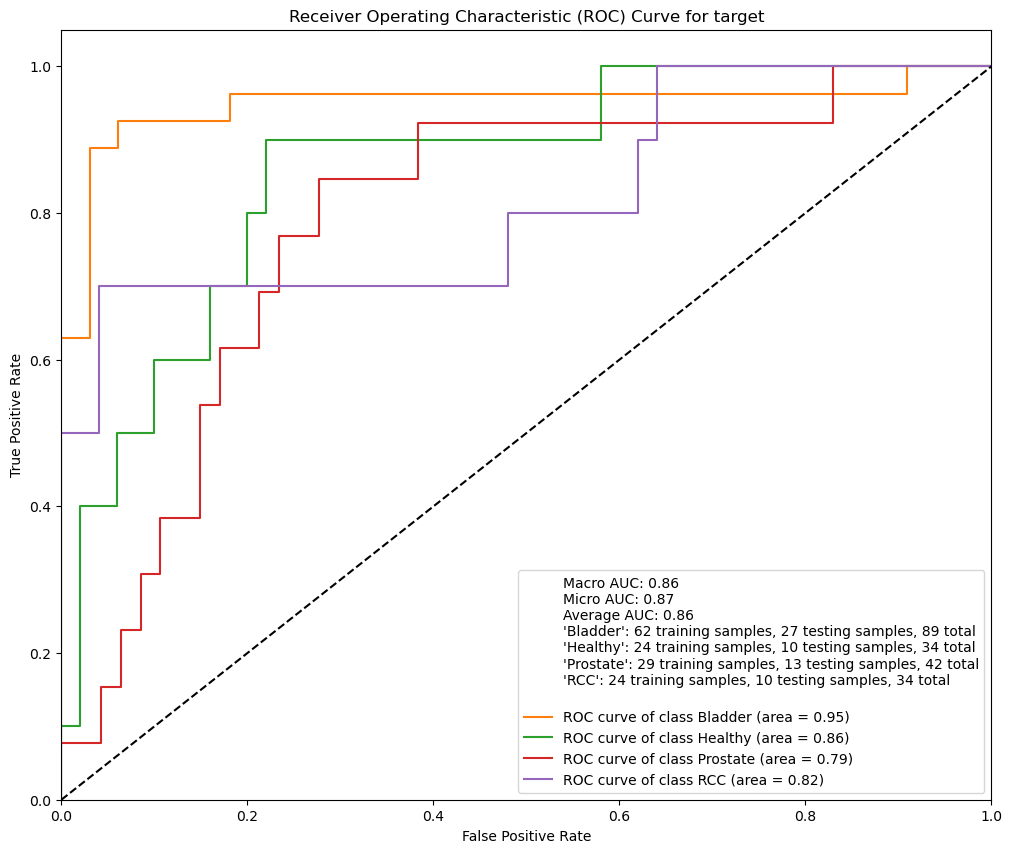

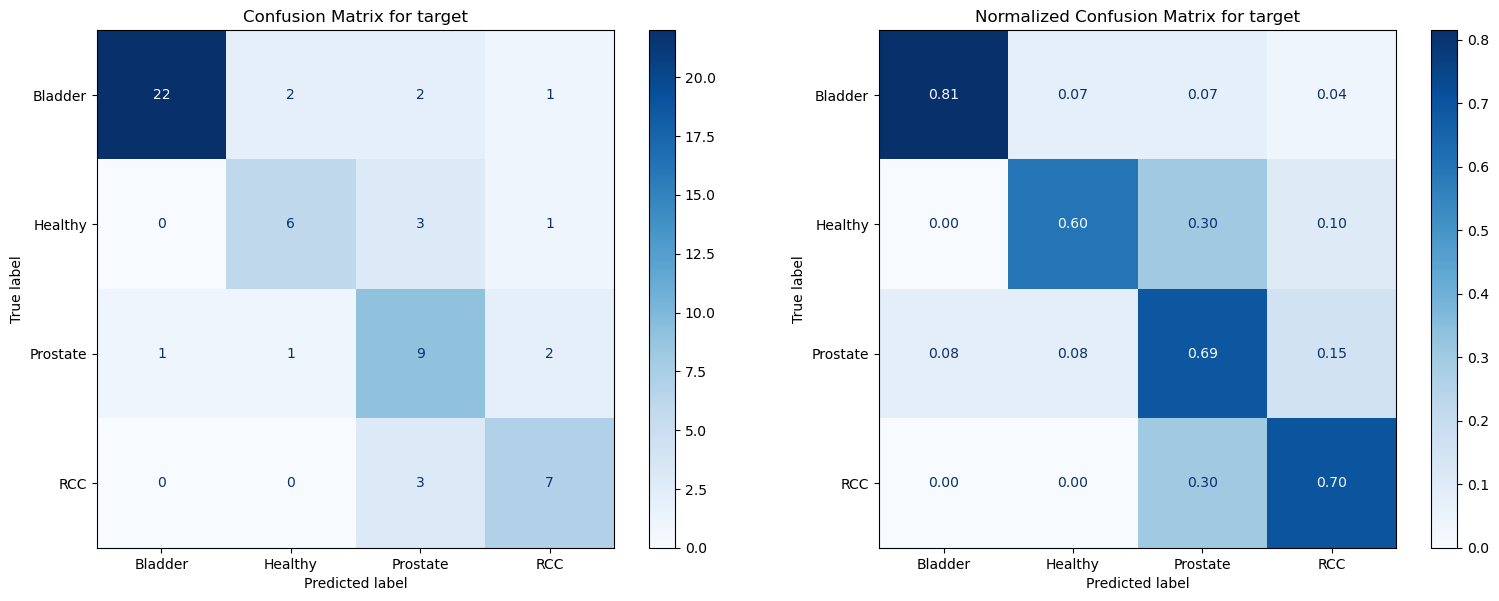

In [48]:

# Train with LogisticRegression and hyperparameter tuning using GridSearchCV
trained_log_reg_model = models.train_model(
        train_subset, 
        test_subset, 
        target_name='target', 
        model=LogisticRegression(random_state=0, class_weight='balanced'), 
        param_grid=param_grid_log_reg, 
        cv=5, 
        scoring='roc_auc_micro',
        search_method='grid'
)

/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used whe

Best hyperparameters found: {'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}


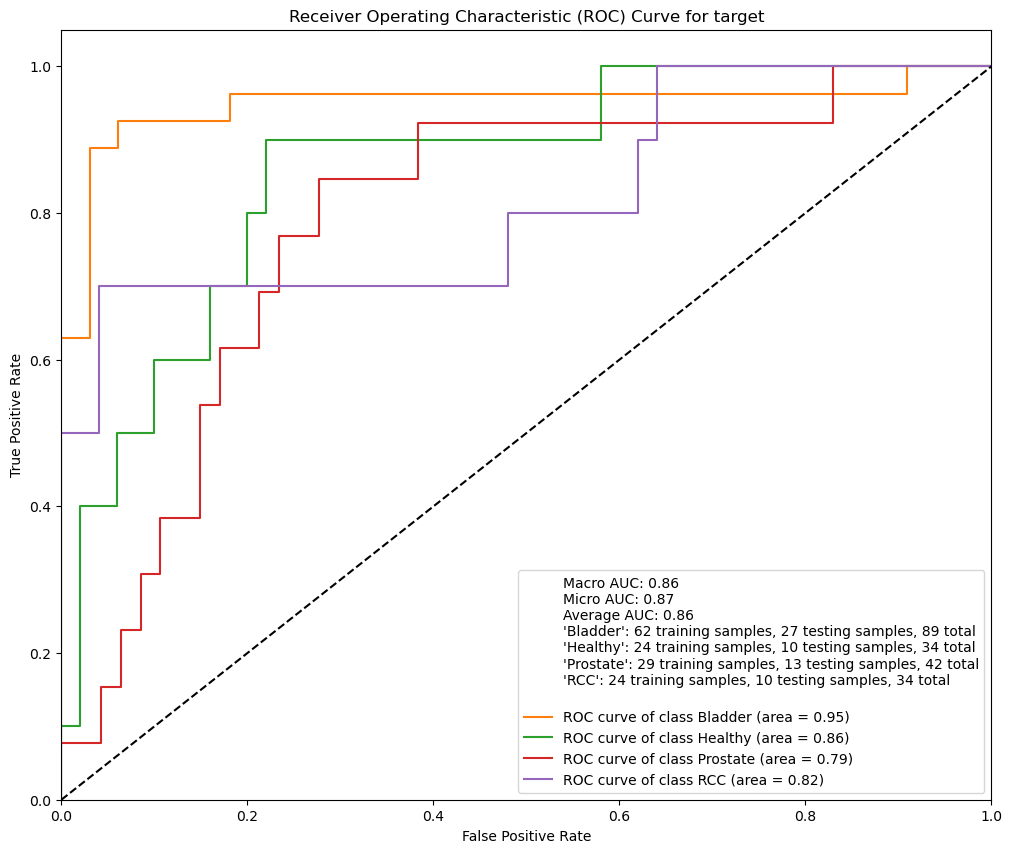

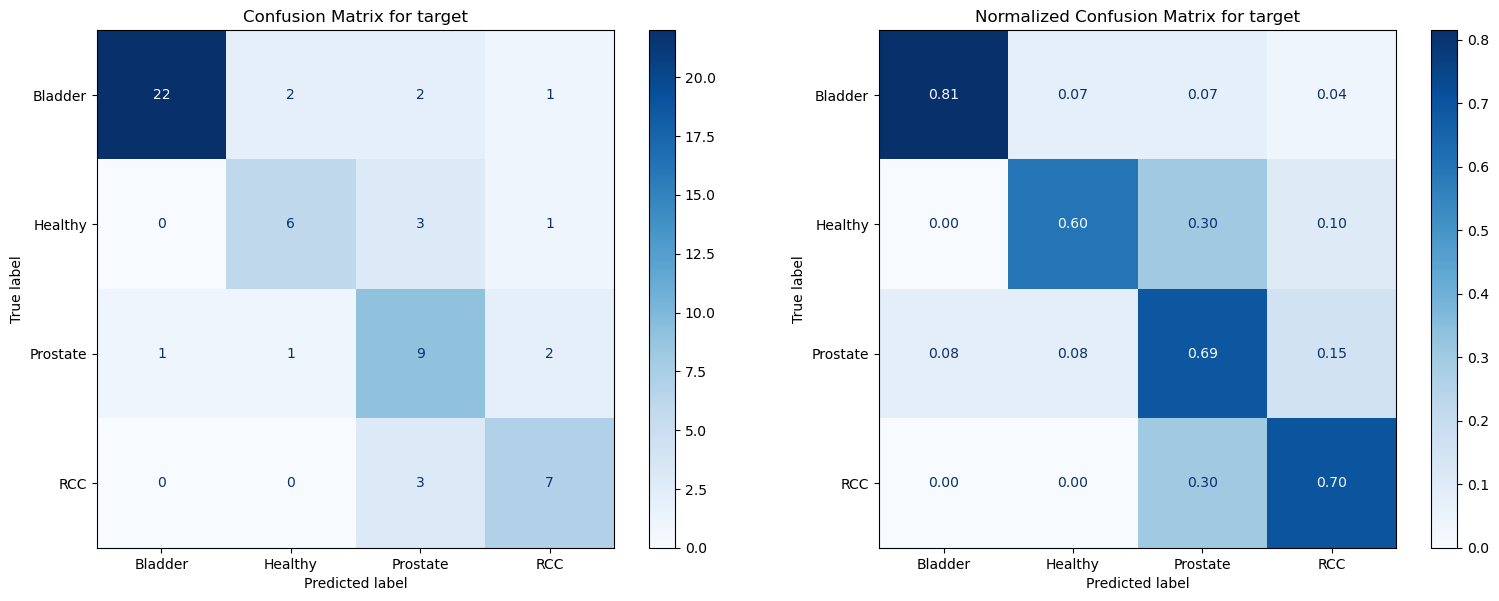

In [39]:
# Train with LogisticRegression and hyperparameter tuning using GridSearchCV
trained_log_reg_model = models.train_model(
        train_subset, 
        test_subset, 
        target_name='target', 
        model=LogisticRegression(random_state=0, class_weight='balanced'), 
        param_grid=param_grid_log_reg, 
        cv=5, 
        scoring='roc_auc_macro',
        search_method='grid'
)

/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ d

Best hyperparameters found: {'C': 100, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}


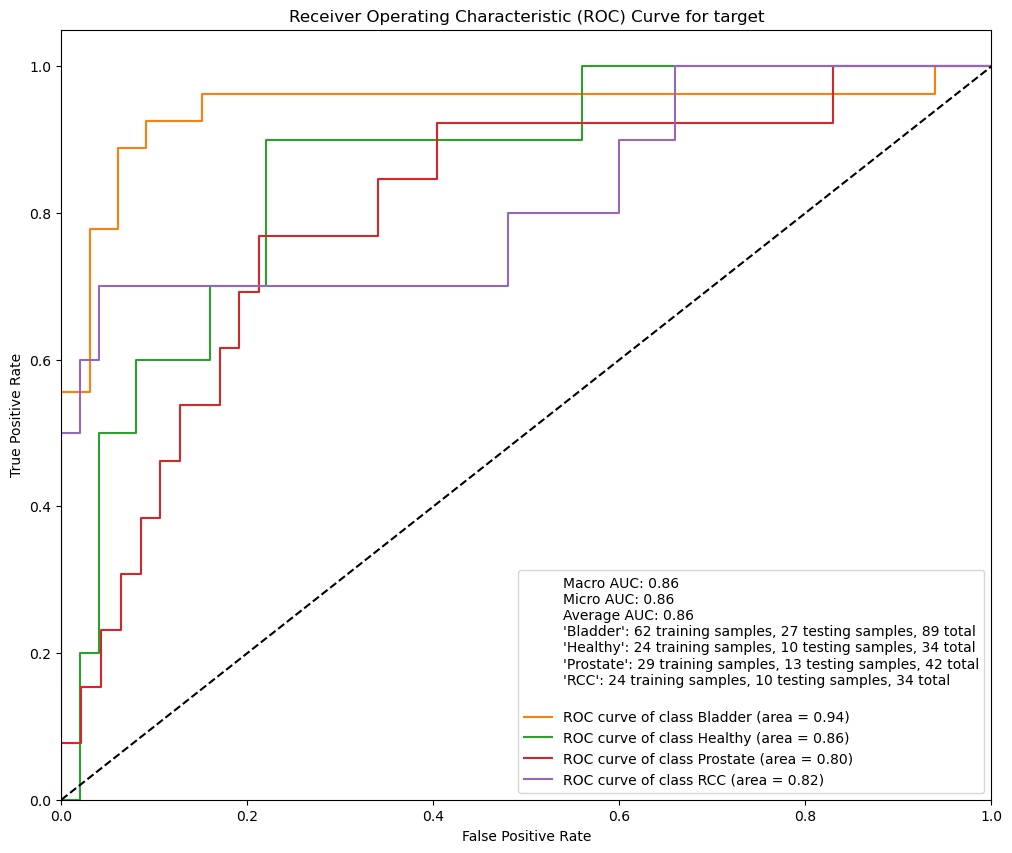

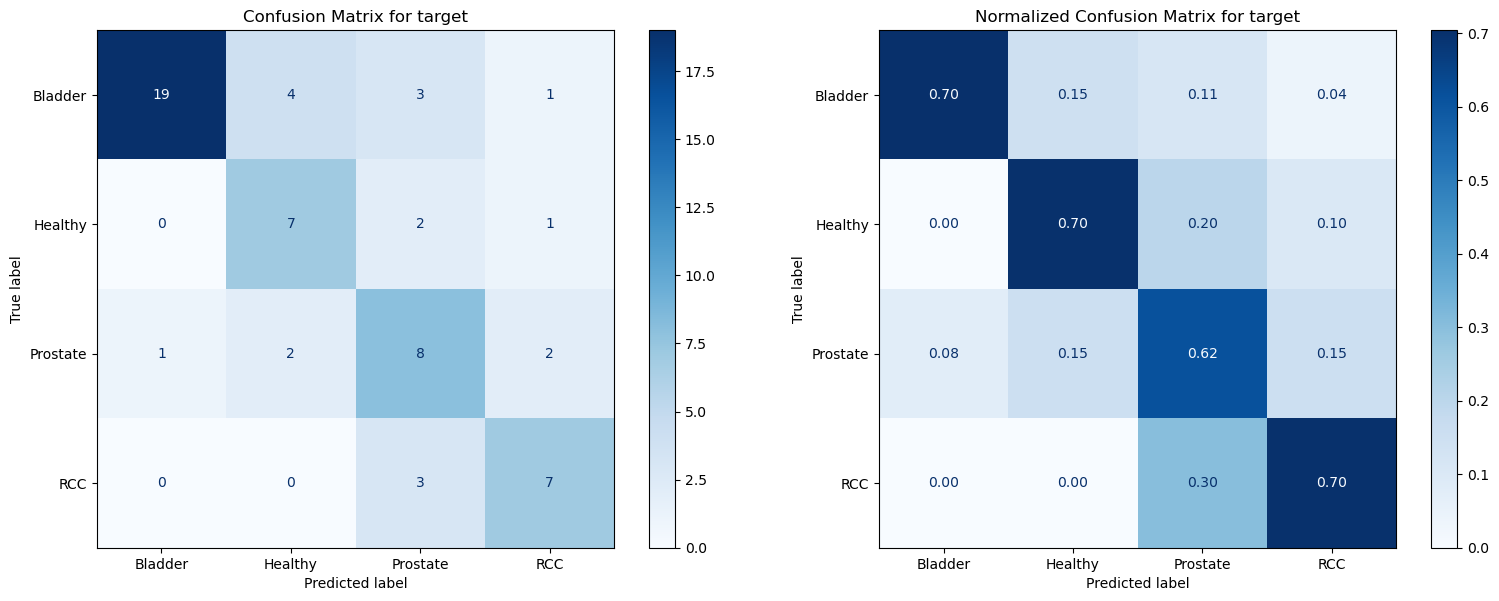

In [40]:


# Train with LogisticRegression and hyperparameter tuning using GridSearchCV
trained_log_reg_model = models.train_model(
        train_subset, 
        test_subset, 
        target_name='target', 
        model=LogisticRegression(random_state=0, class_weight='balanced'), 
        param_grid=param_grid_log_reg, 
        cv=5, 
        scoring='balanced_accuracy',
        search_method='grid'
)

In [41]:
EndMotif_feature_importance.head()

,Feature,Importance
46,EndMotif_AGTG,0.010663
220,EndMotif_TCTA,0.010432
96,EndMotif_CGAA,0.009807
44,EndMotif_AGTA,0.009717
31,EndMotif_ACTT,0.008965


In [42]:
EndMotif_feature_importance.tail()

,Feature,Importance
24,EndMotif_ACGA,0.001797
229,EndMotif_TGCC,0.001796
226,EndMotif_TGAG,0.001664
213,EndMotif_TCCC,0.001567
238,EndMotif_TGTG,0.001499


In [43]:
#train_df, test_df
train_df.head()

,CNA_chr1_p,CNA_chr1_q,CNA_chr10_p,CNA_chr10_q,CNA_chr11_p,CNA_chr11_q,CNA_chr12_p,CNA_chr12_q,CNA_chr13_q,CNA_chr14_q,...,EndMotif_TTCT,EndMotif_TTGA,EndMotif_TTGC,EndMotif_TTGG,EndMotif_TTGT,EndMotif_TTTA,EndMotif_TTTC,EndMotif_TTTG,EndMotif_TTTT,target
PB210_UC1,-0.573814,-0.713541,-0.048668,0.634091,0.142371,0.144318,0.094518,-0.440467,0.674030,-0.185594,...,-1.162777,0.219847,0.248148,-0.187016,-0.425037,-0.751257,-0.412130,-0.393471,-1.878912,Prostate
NU16,0.371485,-0.434472,-0.489411,0.353705,0.395100,0.225185,-0.392697,-0.367090,0.144047,0.277156,...,0.361594,0.264453,0.498474,0.498113,0.407662,-0.287140,-0.015757,0.856602,-1.352863,Healthy
BC020_UC1,-0.410119,-0.365723,-0.001011,0.300331,0.268017,0.103518,-0.065385,-0.146880,0.305529,-0.031610,...,1.121730,0.873620,0.134718,0.063874,0.249281,1.709430,1.456716,1.132388,1.674998,Bladder
RCC008_UC1,0.069789,0.011228,-0.058651,-0.229617,0.187927,0.063824,-0.020173,-0.071081,-0.079508,0.115165,...,1.035271,0.415394,0.606260,0.371700,0.567565,0.409909,0.707822,0.273099,0.457234,RCC
WBC1104_UC1,0.285586,-0.034209,-0.262104,0.219618,0.225148,0.291087,-0.254686,-0.245976,-0.114381,0.282288,...,-0.408472,0.127125,0.397113,0.337269,0.095957,-0.750396,-0.443414,0.220024,-0.635744,Bladder


In [44]:
import Biological_significace as Biosig
import os
import pandas as pd
from statsmodels.stats.multitest import multipletests

def save_plots_and_create_summary(df, feature_df, target_name='target', save_dir=None):
    """
    This function generates and saves box plots for each feature listed in the 'Feature' column of feature_df,
    saves the plots using the plot_feature_boxplot_with_anova function, and creates a summary DataFrame containing
    the F-statistic, p-value, and Benjamini-Hochberg (BH) corrected p-values for each feature.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the features and target.
    feature_df (pd.DataFrame): A DataFrame with a column named 'Feature' listing the features to analyze.
    target_name (str): The name of the target column in df, default is 'target'.
    save_dir (str): The directory where the plots and summary will be saved. This is a required argument.
    
    Returns:
    pd.DataFrame: A DataFrame containing the F-statistic, p-value, and BH-corrected p-value for each feature.
    """
    if not save_dir:
        raise ValueError("The save_dir argument is required.")
    
    # Check if the directory already exists, if so, raise an error
    if os.path.exists(save_dir):
        raise FileExistsError(f"The directory '{save_dir}' already exists. Please choose a different directory or remove it.")
    
    # Create the save directory
    os.makedirs(save_dir)
    
    summary = []
    class_order= ['Bladder','Prostate','RCC','Healthy']
    
    for feature in feature_df['Feature']:
        # Define the save path for each plot
        save_path = os.path.join(save_dir, f"{feature}_boxplot.png")
        
        # Generate and save the plot, and get the F-statistic and p-value
        f_stat, p_value = Biosig.plot_feature_boxplot_with_kruskal(df, feature, target_name=target_name, save_path=save_path, class_order= class_order)
        
        # Append the results to the summary list
        summary.append({
            'Feature': feature,
            'F-statistic': f_stat,
            'p-value': p_value
        })
    
    # Create a summary DataFrame from the list
    summary_df = pd.DataFrame(summary)
    
    # Perform Benjamini-Hochberg correction
    _, bh_corrected_pvals, _, _ = multipletests(summary_df['p-value'], method='fdr_bh')
    
    # Add the BH-corrected p-values to the DataFrame
    summary_df['BH-corrected p-value'] = bh_corrected_pvals
    
    # Save the summary DataFrame as a CSV file in the save directory
    summary_csv_path = os.path.join(save_dir, 'summary.csv')
    summary_df.to_csv(summary_csv_path, index=False)
    
    # Return the summary DataFrame
    return summary_df


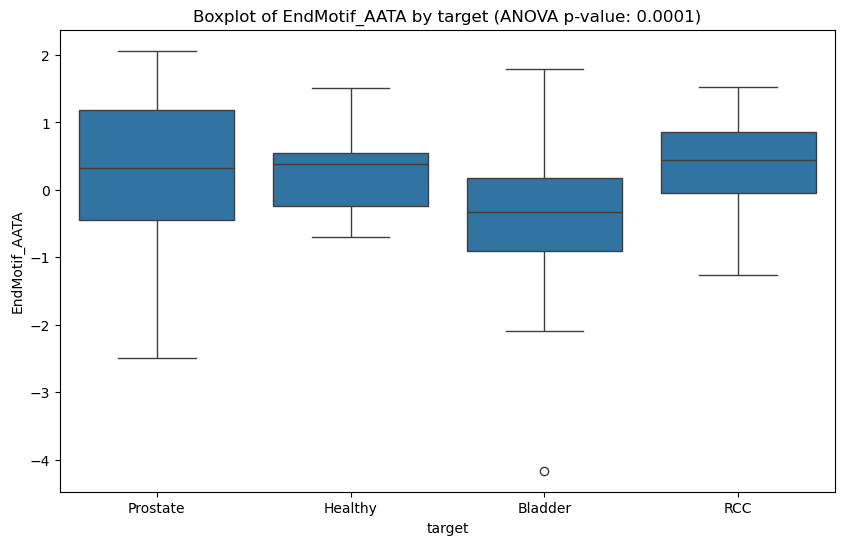

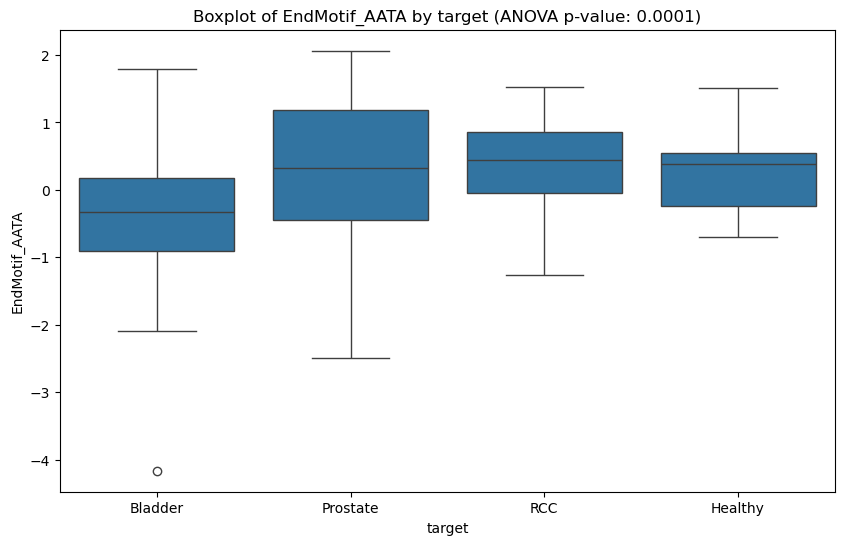

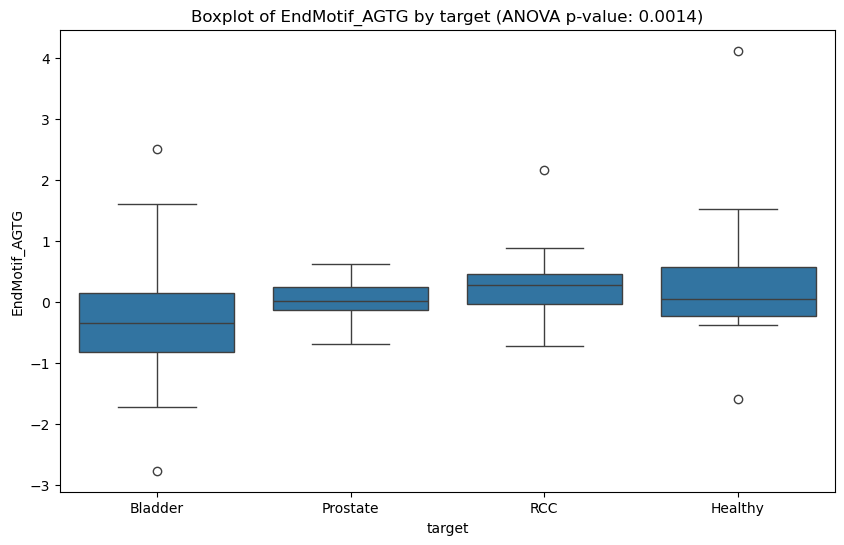

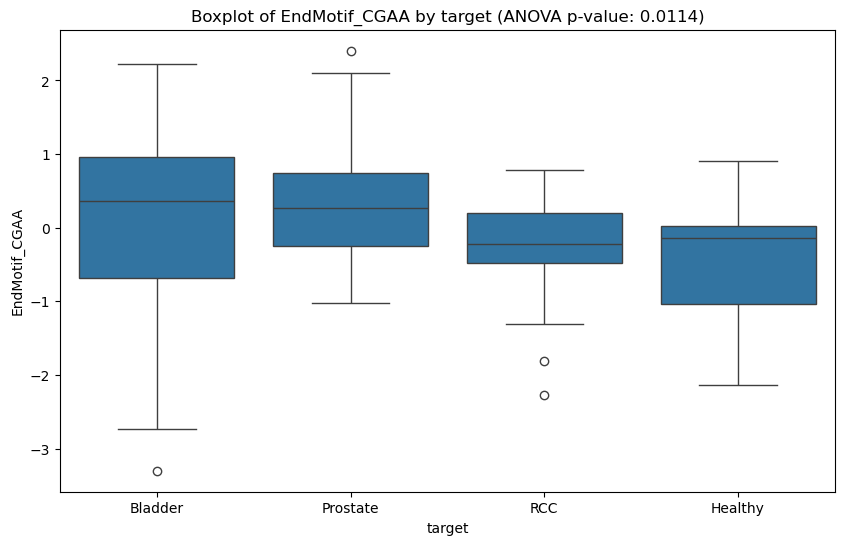

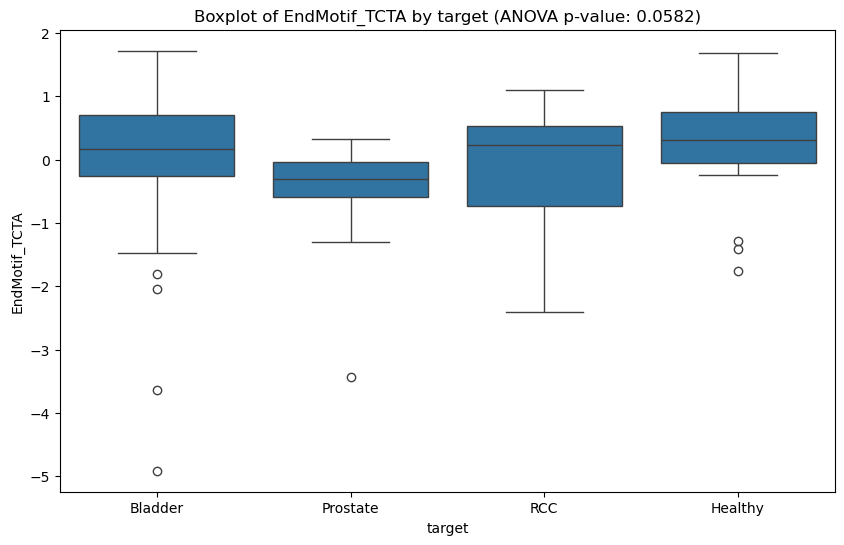

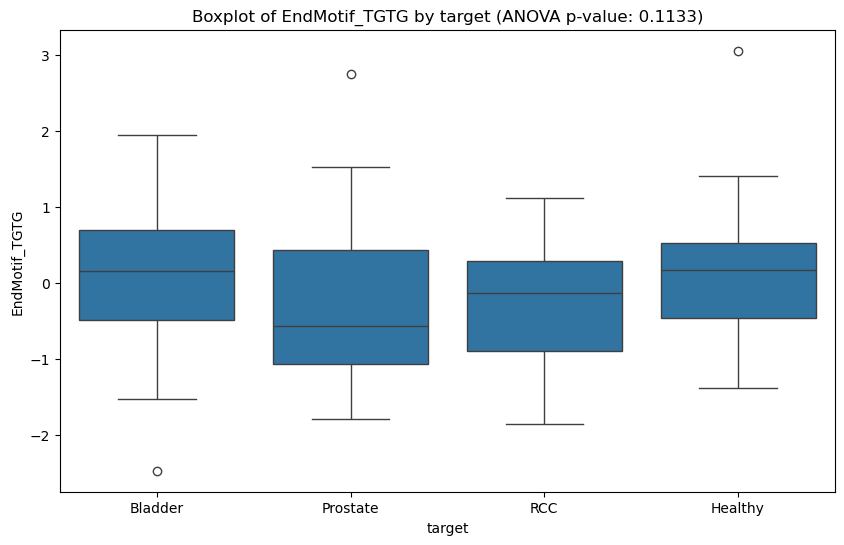

(2.0254815121421372, 0.11329951174764105)

In [45]:

Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_AATA')
Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_AATA',class_order= ['Bladder','Prostate','RCC','Healthy'])
Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_AGTG',class_order= ['Bladder','Prostate','RCC','Healthy'])
Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_CGAA',class_order= ['Bladder','Prostate','RCC','Healthy'])
Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_TCTA',class_order= ['Bladder','Prostate','RCC','Healthy'])
Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_TGTG',class_order= ['Bladder','Prostate','RCC','Healthy'])

In [46]:
EndMotif_Bio = save_plots_and_create_summary(train_df, EndMotif_feature_importance,  save_dir=Output_dir+'/EdMotif_traindf_KruskalWallis/')
display(EndMotif_Bio.head())

NameError: name 'Output_dir' is not defined